# Part I  - Exploration and Analysis of Loan Data from Prosper

### by F Njakai



## Table of Contents

* [Introduction](#intro)
* [Preliminary Wrangling](#prel-wrangling)
* [Univariate Exploration](#univar)
* [Bivariate Exploration](#bivar)
* [Multivariate Exploration](#multivar)
* [Summary of Findings](#summary)
* [Conclusions](#outro)

<div id="intro"></div>

## Introduction

[Prosper](https://www.prosper.com/) is a peer-to-peer lending marketplace. At the time of writing, Prosper operates in the US and has issued loans worth over USD 22 billion to _c._ 1.4 million borrowers. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000.00 and USD 40,000.00. Individuals, like you and I, and institutions, Sequoia Capital for example, invest in said loans. Prosper handles all loan servicing on behalf of the borrowers and investors.

The data set at hand has 113,937 observations (loans, if you like) and 81 variables; detailed information on the variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Observations relate to the years 2005 to 2014, inclusive.

<div id="prel-wrangling"></div>



## Preliminary Wrangling

### upgrade pandas

In [2]:
#upgrade `pandas`
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 3.4MB/s eta 0:00:01    56% |██████████████████▏             | 5.4MB 28.3MB/s eta 0:00:01    85% |███████████████████████████▍    | 8.2MB 29.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   17% |█████▊                          | 2.4MB 23.7MB/s eta 0:00:01    44% |██████████████▏                 | 5.9MB 26.5MB/s eta 0:00:01    53% |█████████████████▎              | 7.2MB 26.5MB/s eta 0:00:01    94% |██████████████████████████████▎ | 12.7MB 25.4MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 19.1MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Found existing insta

In [1]:
#import all packages and set plots to be embedded inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='once')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from os import path
from contextlib import suppress

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


#### Default settings for plots

automate, as much as possible, the process of creating visualisations

why?
* it is efficient
* visualisations are consistent

how?
* create templates


In [2]:
#template no. 1

#default blue
default_blue = sns.color_palette('tab10')[0]

#default orange, if required
default_orange = sns.color_palette('tab10')[1]


#default palette
default_palette = sns.color_palette('tab10')

In [3]:
#template no. 2

'''
simple function to create `Figure` object
using matplotlib that contains an x-lab,
y-lab and title.

"Father Figure", if you like :)

3 params, all type `str`:
x_lab, y_lab and title

Please make sure all args passed to the 
function are type `str`

return: None
'''
def create_fig(x_lab: str, y_lab: str, title: str):
    """create_fig function"""
    try:
        #fig size
        plt.figure(figsize=(10, 6.18), dpi=216, frameon=False, clear=True)
        #x-axis name
        plt.xlabel(x_lab)
        #y-axis name 
        plt.ylabel(y_lab)
        #title
        plt.title(title)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


In [4]:
#template no. 3

'''
simple function to create `Figure` object
using matplotlib for sub-plots.

"Father Figure" for subplots :)

2 params, type int; the number of sub-plots.
@n_row -> #rows
@n_col -> #cols

return: fig and ax objects
'''
def create_sub(n_row: int=1, n_col: int=1):
    """create_sub function"""
    try:
        #fig, ax and figsize
        fig, ax = plt.subplots(n_row, n_col, figsize=(10,6.18), dpi=216)
        fig.tight_layout(pad=10.0)
        return fig, ax
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


###### helper functions

In [5]:
#see if a df exists

'''
a simple function to see if a df exists

takes in 1 param: name of the df

Please do not pass the arg as a string

return: None
'''

def confirm_df_exists(df):
    """ function confirm_exists """
    if not df.empty:
        print(f'This dataframe exists')
        return
    print(f'This dataframe does not exist')
    



In [6]:
#group data and find mean

'''
Function to calculate mean of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: average  of grouped data
'''

def group_avg(var_1, var_2):
    """ function group_avg"""
    if var_1 and var_2:
        avg_gp_data = df.groupby(var_1)[var_2].mean()
        return avg_gp_data
    else:
        print(f'Check that both arguments are columns of a pandas DF and try again')

In [7]:
#group data and find sum

'''
Function to calculate sum of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: sum  of grouped data
'''

def group_sum(var_1, var_2):
    """ function group_sum"""
    if var_1 and var_2:
        sum_gp_data = df.groupby(var_1)[var_2].sum()
        return sum_gp_data
    else:
        print(f'Check that both arguments are columns of s pandas DF and try again')

In [8]:
'''
function to create and sort a DF

3 params:
@x: pandas series #1
@y: pandas series #2
@ascending: bool, default T

return: pandas DF
'''
def custom_sort_df(x, y, ascending:bool=True):
    """function custom_sort_df"""
    try:
        dd = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
        dd.sort_values('Count', inplace=True, ascending=ascending)
        dd.reset_index(inplace=True)
        return dd
    except:
        print(f'Check that x and y are pandas series and try again')
        raise

In [9]:
'''
function to confirm that a file has been created
and/or exists in the current dir

one param: type `str`:
@file_name -> name of the file (include extension, please)

return: none
'''

def confirm_file_exists(file_name: str):
    """function confirm_file_exists"""
    if path.exists(file_name):
        print(f'File exists')
    else:
        print(f'Something went wrong. Investigate')

#### Load and inspect the data set

In [10]:
#load the data set
df = pd.read_csv('prosperLoanData.csv', sep=',')
confirm_df_exists(df)

This dataframe exists


In [11]:
df.shape

(113937, 81)

In [12]:
df.duplicated().value_counts()

False    113937
dtype: int64

In [13]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [18]:
df.sample(randint(5, 15))

ListingKey  ListingNumber            ListingCreationDate  \
106036  D41B3366294853884A3A89C           2796  2006-03-21 13:18:53.110000000   
77212   18AD339102880364988E6E3         143834  2007-05-28 21:33:30.417000000   
62636   DDB63426097521851603462         362582  2008-07-06 05:22:35.263000000   
74360   59643430764563411B3EC45         392405  2008-09-03 13:22:58.180000000   
103085  959A3471861802972ADDCAF         440621  2010-01-02 05:31:19.537000000   
68869   341F355831215718458FE3B         639586  2012-09-13 15:49:42.213000000   
36629   4E4E35169427580923B098A         509704  2011-06-04 07:24:03.963000000   
40847   B5B433679368451001A76B1          40931  2006-09-20 20:54:14.143000000   
50850   423F360036668300091C50F        1136612  2014-01-15 17:07:26.827000000   
99514   ED083395499578642F81DF1         171379  2007-07-17 20:28:42.807000000   

       CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
106036          AA    36   Completed  2007-05-09 00:00:00      0.08584   
77212           AA    36   Completed  2009-04-24 00:00:00      0.08684   
62636            A    36   Completed  2010-12-02 00:00:00      0.10033   
74360            A    36   Completed  2011-09-12 00:00:00      0.10336   
103085         NaN    36   Defaulted  2010-08-15 00:00:00      0.36742   
68869          NaN    36     Current                  NaN      0.31012   
36629          NaN    36   Completed  2012-07-24 00:00:00      0.27467   
40847            A    36   Completed  2009-09-25 00:00:00      0.10190   
50850          NaN    36     Current                  NaN      0.14206   
99514            D    36  Chargedoff  2009-12-01 00:00:00      0.20684   

        BorrowerRate  LenderYield    ...     LP_ServiceFees  \
106036        0.0790       0.0740    ...             -14.07   
77212         0.0800       0.0750    ...             -32.15   
62636         0.0865       0.0765    ...             -99.22   
74360         0.0895       0.0795    ...             -96.39   
103085        0.3430       0.3330    ...              -5.18   
68869         0.2710       0.2610    ...             -47.41   
36629         0.2399       0.2299    ...             -20.55   
40847         0.0950       0.0900    ...             -24.08   
50850         0.1139       0.1039    ...              -4.25   
99514         0.1995       0.1895    ...             -67.32   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
106036               0.00                   0.00                 0.00   
77212                0.00                   0.00                 0.00   
62636                0.00                   0.00                 0.00   
74360                0.00                   0.00                 0.00   
103085               0.00                2938.57              2938.57   
68869                0.00                   0.00                 0.00   
36629                0.00                   0.00                 0.00   
40847                0.00                   0.00                 0.00   
50850                0.00                   0.00                 0.00   
99514             -126.43                2339.44               903.96   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
106036                            0.00            1.0                0   
77212                             0.00            1.0                0   
62636                             0.00            1.0                0   
74360                             0.00            1.0                0   
103085                            0.00            1.0                0   
68869                             0.00            1.0                0   
36629                             0.00            1.0                0   
40847                             0.00            1.0                0   
50850                             0.00            1.0                0   
99514                           280.52            1.0                0   

 

### Structure

#### Overall

* 113,937 observations
* 81 variables
    * 3 of type `bool`
    * 50 of type `float`
    * 11 of type `int`
    * 17 of type `str`
* variable `LoanOriginationDate` is of type `str`
* variables `Occupation` and `IncomeRange` are of type `str`

#### Missing and null values

* some observations in `df` have missing or null values
    * case(s) in point
        * 100,596 under variable `GroupKey`
        * 96,985 under variable `LoanFirstDefaultedCycleNumber`
    * will decide which ones to fill and/or drop on a case-by-case basis
        * why?
            * some variables are [qualitative](https://www.statology.org/qualitative-vs-quantitative-variables/)
            * some variables apply to an observation conditionally
                * example: `GroupKey` represents observations that fall under a criteria; the number of said groups cannot  be reasonably expected to be 113,937
                

#### Duplicated observations

* `df` has no duplicated observations

#### Multiple values for a variable

* observations in `df` have 1 value per variable 



### Feature(s) of interest in the data set

* characteristics of Prosper's loans over time
    * how many loans have been written
    * what the average rate offered to borrowers is
    * what the average amount of a loan is
* what the average customer looks like
    * another way of saying it is: to whom does Prosper lend?
* what affects the rate offered to a customer (borrower, if you like)
* what affects the number of investors of a loan

### Feature(s) in the data set that may help support investigation into feature(s) of interest

* variables `LoanOriginalAmount`, `LoanOriginationDate` and `BorrowerRate` will help answer the first question
* variables `Borrowerrate`, `Term`, `BorrowerAPR`, `StatedMonthlyIncome` and `EmploymentStatusDuration` among others will help answer the next two questions
* variables `Borrowerrate`, `PercentFunded`, and `Investors` will help answer the last question


### Clean the data set

* will perform a chap-chap cleaning process viz:
    * drop variables whose missing values are above a threshold (in this case, 15%)
    * drop observations whose missing values are above a threshold (in this case, 10%)
    * change the type of  variable `LoanOriginationDate` to `datetime`
    * change the type of variables `Occupation` and `IncomeRange` to `category`

In [14]:
#create a copy of the df
df = df.copy()

In [15]:
#drop variables whose missing values are above the threshold
df.drop(columns=df.columns[df.eq(0).mean()>0.85], inplace=True)
df.shape

/opt/conda/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /opt/conda/lib/python3.6/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/opt/conda/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /opt/conda/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


(113937, 72)

In [24]:
#drop observations whose missing values are above the threshold
df.drop(index=df.columns[df.eq(0).mean()>0.9], inplace=True)

In [ ]:
#save cleaned data set as a `.csv` file then load it under the variable `df`

#save data set as a `.csv`
df.to_csv('prosper_loans_data.csv', index=False, encoding='utf-8', sep=',')

#confirm that the`.csv` file exists
confirm_file_exists('prosper_loans_data.csv')

In [5]:
#load the clean df
df = pd.read_csv('prosper_loans_data.csv', sep=',')
confirm_df_exists(df)

This dataframe exists


In [11]:
#change the type of variable `LoanOriginationDate` to `datetime`
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.LoanOriginationDate.sample(randint(3, 5))

64192    2013-07-25
84744    2013-07-25
29403    2008-02-27
107422   2012-12-11
26928    2013-04-03
Name: LoanOriginationDate, dtype: datetime64[ns]

In [12]:
#change the type of variables `Occupation` and `IncomeRange` to `category`
df.Occupation = df.Occupation.astype("category")
df.IncomeRange = df.IncomeRange.astype("category")

In [13]:
#handling categorical variables for ease of plotting
df_0 = {'LoanStatus' : ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                      'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                      'Defaulted', 'ChargedOff', 'Cancelled'],
     'IncomeRange' : ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed',
                       'Not employed'],
     'ProsperRating (Alpha)' : ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
     'IsBorrowerHomeowner' : [True, False],
     'IncomeVerifiable' : [False, True]
       }


for i in df_0:
    ordered_df = pd.api.types.CategoricalDtype(ordered= True, categories= df_0[i])
    df[i] = df[i].astype(ordered_df)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 72 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             101945 non-null category
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha

#### Generate a pre-EDA report using `sweetviz`

In [20]:
# pre_eda_rpt = sv.analyze(df)
# pre_eda_rpt.show_html('./Summary_EDA_Report.html')

##does not work; notebook does not support sweetviz :(

<div id="univar"></div>

## Univariate Exploration

### Method <div id="method"></div>

   * ask a question
      * state what will be done to answer the question
   * code
      * do what was stated
   * visualise
   * state the findings


### Question #1

#### What is the average amount borrowed?

* QED; find the mean of `LoanOriginalAmount`
* will look at the quartiles and std dev too

In [28]:
pd.DataFrame(df.LoanOriginalAmount.describe())

LoanOriginalAmount
count        113937.00000
mean           8337.01385
std            6245.80058
min            1000.00000
25%            4000.00000
50%            6500.00000
75%           12000.00000
max           35000.00000

#### Findings

* average amount borrowed is _c._ USD 8,337.00
* loans of amount USD 5k, 10k, 15k, 20k and 25k have higher-than-average frequency
* the range is USD 1,000.00 to 35,000.00
    * [Prosper's website](https://www.prosper.com/about) says USD 2,000.00 to 40,000.00
    * this could be, among others:
        * `Prosper` could have revised its loan policy
        * `Prosper` could have increased its product offering
* the CV is _c._ 0.75 (6245.80058/8337.01385); this suggests that majority of the observations are close to the mean
    * majority of the amounts are in the range USD 1,000.00 to 15,000.00
* the mean is greater than the median (50%); this suggests a skew to the right


a histogram of the above...

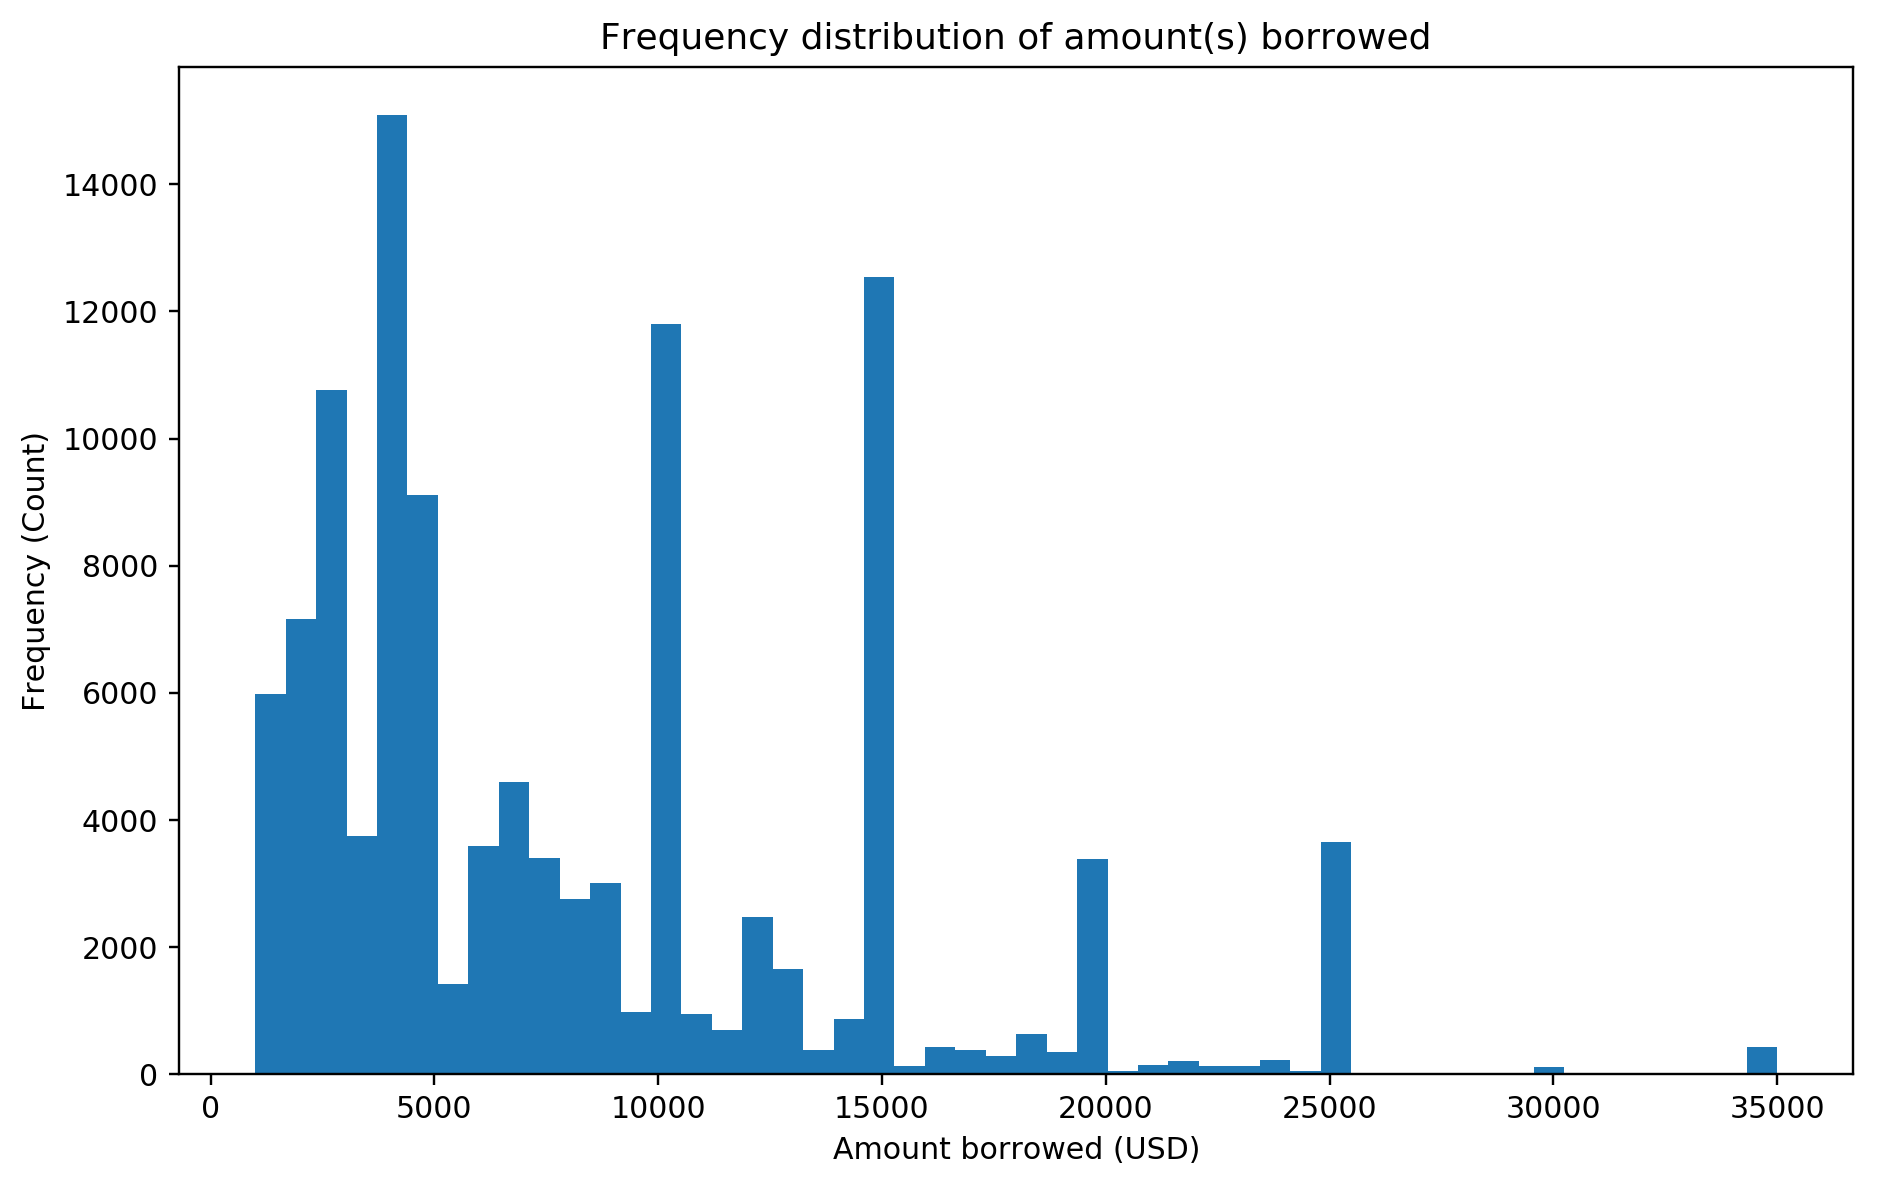

In [29]:
#create a hist
create_fig('Amount borrowed (USD)','Frequency (Count)','Frequency distribution of amount(s) borrowed')
plt.hist(df.LoanOriginalAmount, bins=50, color=default_blue);

### Question #2 <div id="q2"></div>

#### What is the average rate of borrowing?

* find the mean of `BorrowerRate`
* look at quartile and std dev too

In [30]:
pd.DataFrame(df.BorrowerRate.describe())

BorrowerRate
count  113937.000000
mean        0.192764
std         0.074818
min         0.000000
25%         0.134000
50%         0.184000
75%         0.250000
max         0.497500

#### Findings

* average rate is _c._ 0.19%
* the range is zero to 0.5%
    * does `Prosper` offer interest-free loans?
    * if yes:
        * who do they lend to at that rate?
        * why?
        * what are the pre-requisites and terms?
* the CV is _c._ 0.39 (0.074818/0.192764); this suggests that observations are more or less evenly distributed around the mean
    * there are, however, rates that have higher-than-average frequency at the range 0.08% to 0.35%
* the mean is slightly greater than the median (50%); this suggests a slight skew to the right


a histogram of the above supports the findings...

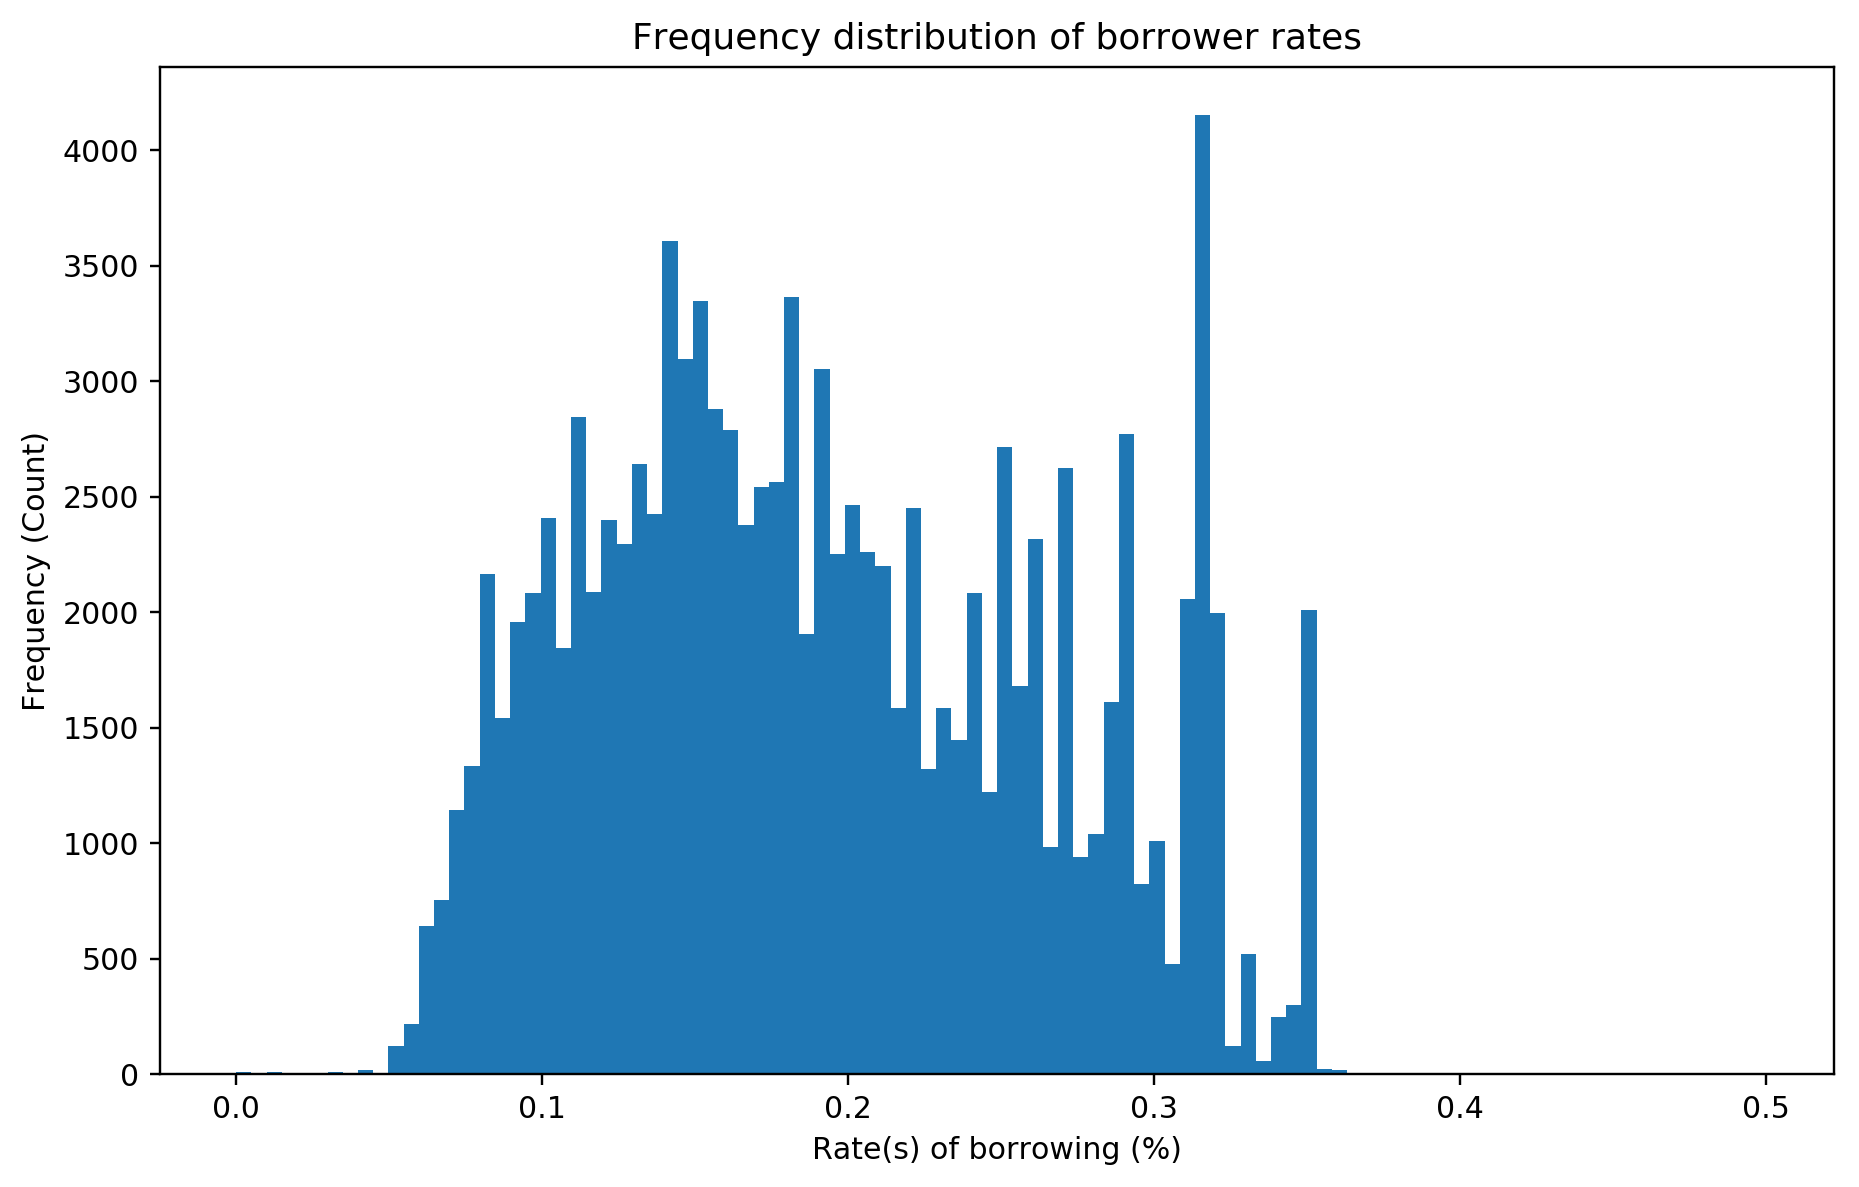

In [31]:
#create hist
create_fig('Rate(s) of borrowing (%)', 'Frequency (Count)', 'Frequency distribution of borrower rates')
plt.hist(df.BorrowerRate, bins=100, color=default_blue);

### Question #3

#### How does the number of loans issued behave over the years?

* does it change at all?
    * if yes, what is the direction of change?
* plot the number of loans issued against `LoanOriginationDate `

In [29]:
#sum of loans by year
sum_loan_time = group_sum('LoanOriginationDate','LoanNumber')

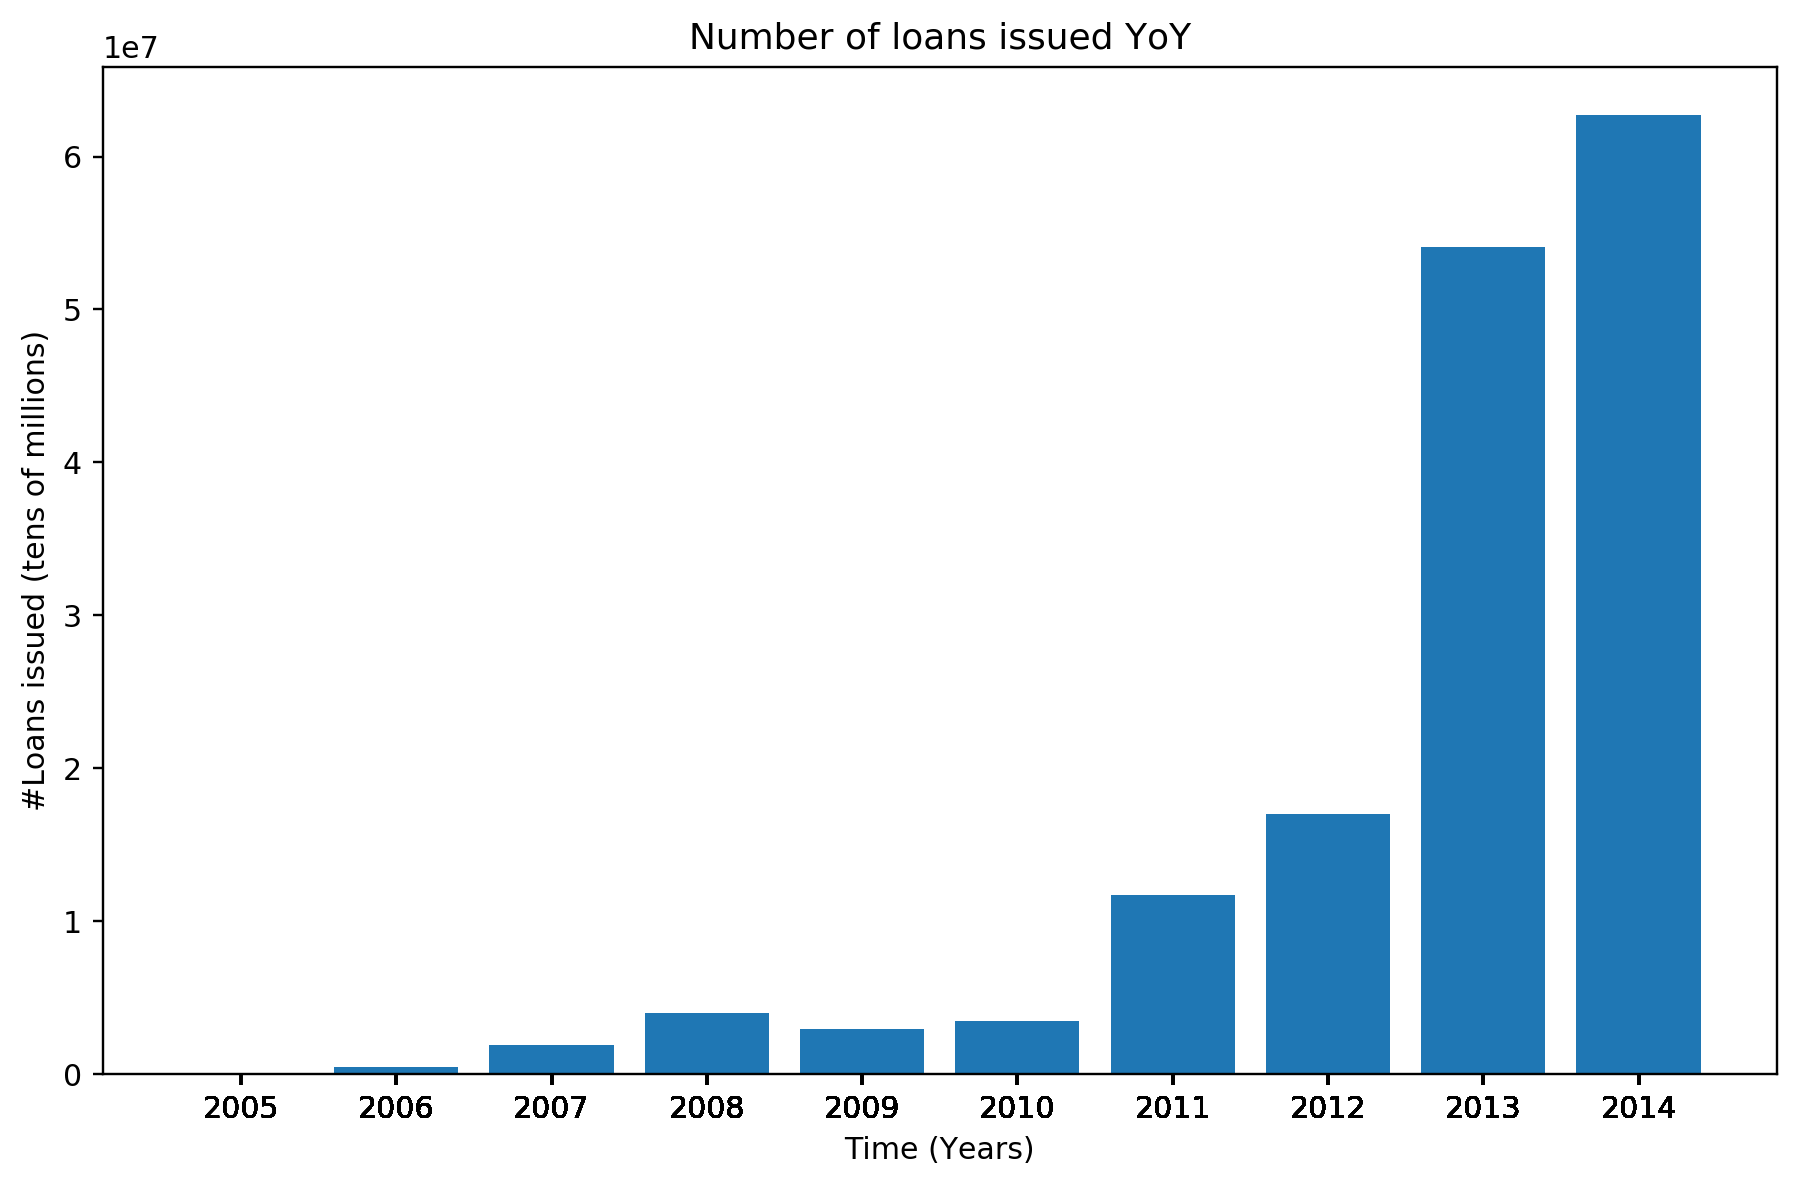

In [30]:
#number of loans issued
y = [sum_loan_time.values[i] for i in range(len(sum_loan_time))]

#time (years)
x = [sum_loan_time.index[i].year for i in range(len(sum_loan_time))]

#create plot
create_fig('Time (Years)', '#Loans issued (tens of millions)', 'Number of loans issued YoY')
plt.bar(x, y, tick_label=x, color=default_blue)
plt.yticks(np.arange(0, 65000000, step=10000000));

In [34]:
#view basic descriptive stats of `sum_loan_time`
pd.DataFrame(sum_loan_time).describe()

LoanNumber
count  1.873000e+03
mean   4.224397e+06
std    7.469088e+06
min    1.000000e+00
25%    6.210580e+05
50%    1.297575e+06
75%    4.252496e+06
max    6.274263e+07

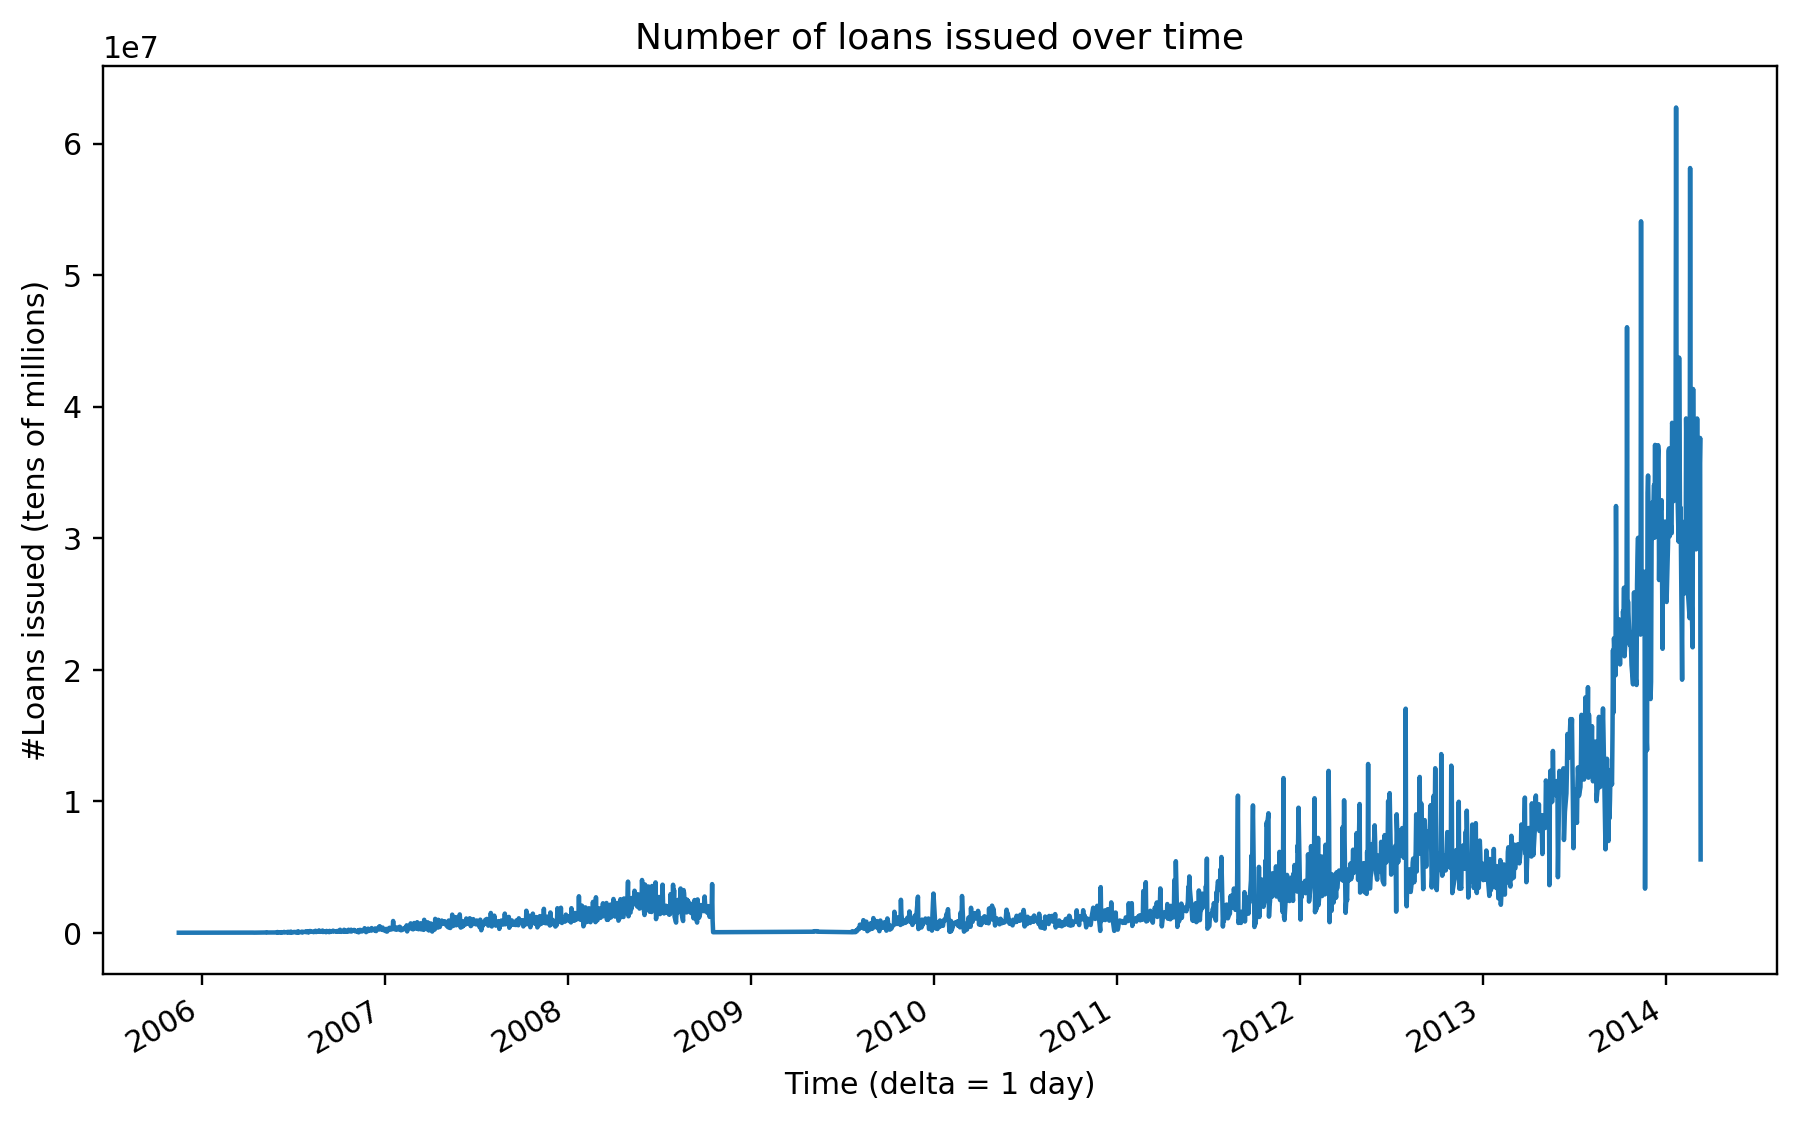

In [35]:
#time series plot for `sum_loan_plot` by the day
create_fig('Time (Days)', '#Loans issued (tens of millions)', 'Number of loans issued over time')
sum_loan_time.plot(kind='line',color=default_blue)
plt.xlabel('Time (delta = 1 day)');

#### Findings

* the number of loans disbursed changes with time
    * the number fluctuates
        * there are seemingly regular but wide fluctuations according to the time series
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
        * the highest number of loans issued, in a year, before 2011 were issued in 2008 according to the bar chart

* there appears to be an exponential trend
    * trend shows that number of loans issued appears to increase exponentially despite the fluctuations

* findings from summary statistics 
    * the average number of loans issued, per annum, between 2005 and 2014 inclusive is _c._ 4.3 million
    * the range is 1 to _c._ 63 million
    * the standard deviation is large (_c._ 7.5 million); it follows that the variance (the fluctuations discussed above) is quite large

What, really, happens:
  * before 2007
  * during Q4 2008 to Q3 2009, inclusive

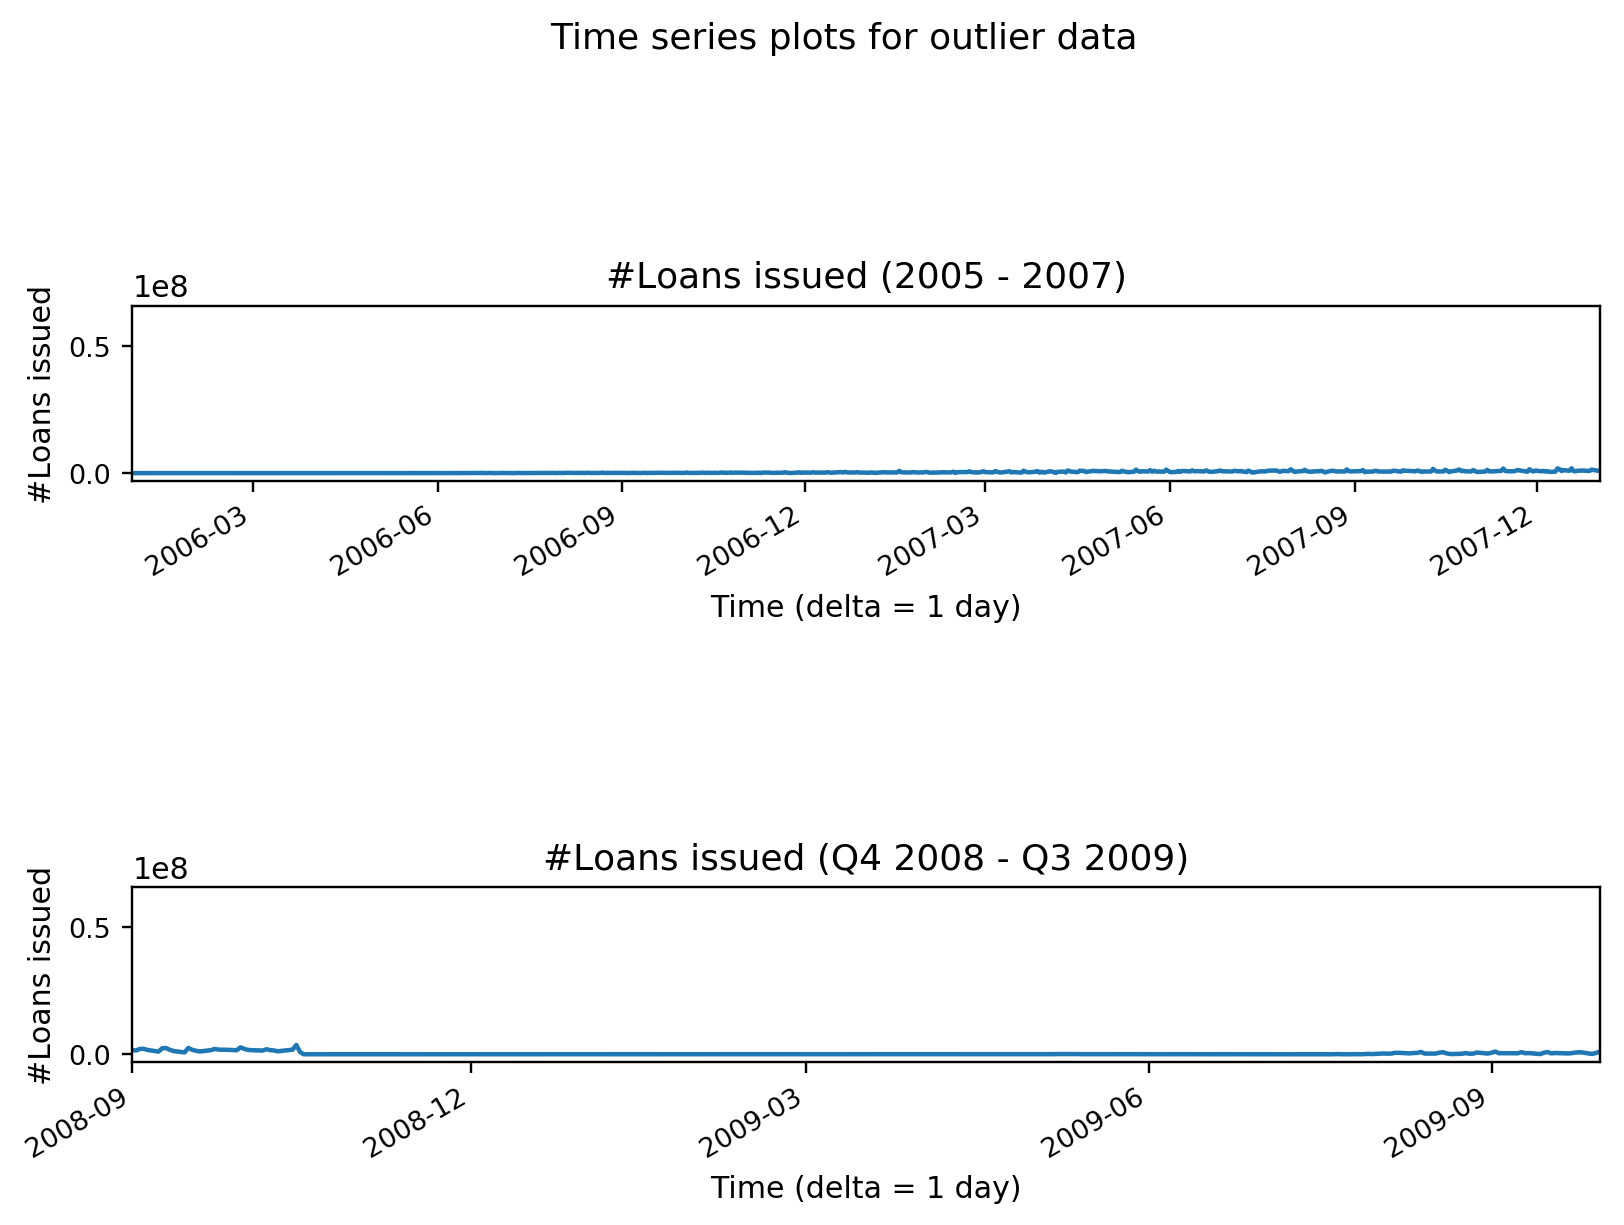

In [36]:
#visualise said timelines
create_sub(2,1)
plt.suptitle('Time series plots for outlier data')

#sub-plot #1: loans issued pre-2007
plt.subplot(2, 1, 1)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2005-12-31','2008-01-01'], title='#Loans issued (2005 - 2007)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.ylabel('#Loans issued');

#sub-plot #2: loans issued during Q4 2008 to Q3 2009
plt.subplot(2,1,2)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2008-09-01','2009-09-30'], title='#Loans issued (Q4 2008 - Q3 2009)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.xticks(['2008-09', '2008-12', '2009-03', '2009-06', '2009-09'])
plt.ylabel('#Loans issued');

##### What happens before 2007?
   * nothing, for the most part
   * activity begins at the beginning of Q2 2007
   * little activity; less than a million loans, in total, are issued

##### What happens during Q4 2008 to Q3 2009, inclusive?
   * nothing, for the most part
   * activity ceases during the middle of Q4 2008
   * said activity stays at zero until late Q2 2009
   * little activity; less than fifteen million loans, in total, are issued

### Discussion on  the distribution(s) of the variable(s) of interest

* variable `LoanOriginalAmount`:
    * multi-modal; there are peaks at multiples of USD 5,000.00
    * skewed to the right
    * majority of the observations are close to the mean
* variables `LoanOriginationDate` and `LoanNumber`:
    * have been processed to show the number of loans issued over time using a time series plot
    * skewed to the left; suggests an exponential-type distribution
* variable `BorrowerRate`:
    * multi-modal; there are peaks at multiples of 0.5%
    * skewed to the right
    * majority of the observations are close to the mean

#### are there any unusual points? 
* yes, for the time series plot
    * little to no activity during:
        * 2005 to 2007
        * Q4 2008 to Q3 2009

#### was there a need to perform any transformations?
* yes
    * variables `LoanOriginationDate` and `LoanNumber` were processed to show the number of loans issued over time

#### of the features investigated, are there any unusual distributions? 
* none, to the best of my knowledge

#### have any operations to tidy, adjust, or change the form of the data been performed? 
* yes
    * variable `LoanOriginationDate` was converted to type `datetime`

#### if so, why?
* to create a time series plot

### carrying on with univariate exploration...

### Question #4

#### To whom does Prosper lend?

* this is a broad question; emphasis on occupation, income level, home ownership status, state of residence and employment status
    * plot a chart of:
        * top ten occupations
        * bottom ten occupations
        * income groups
        * home ownership
        * top ten states of residence
        * bottom ten states of residence
        * employment status

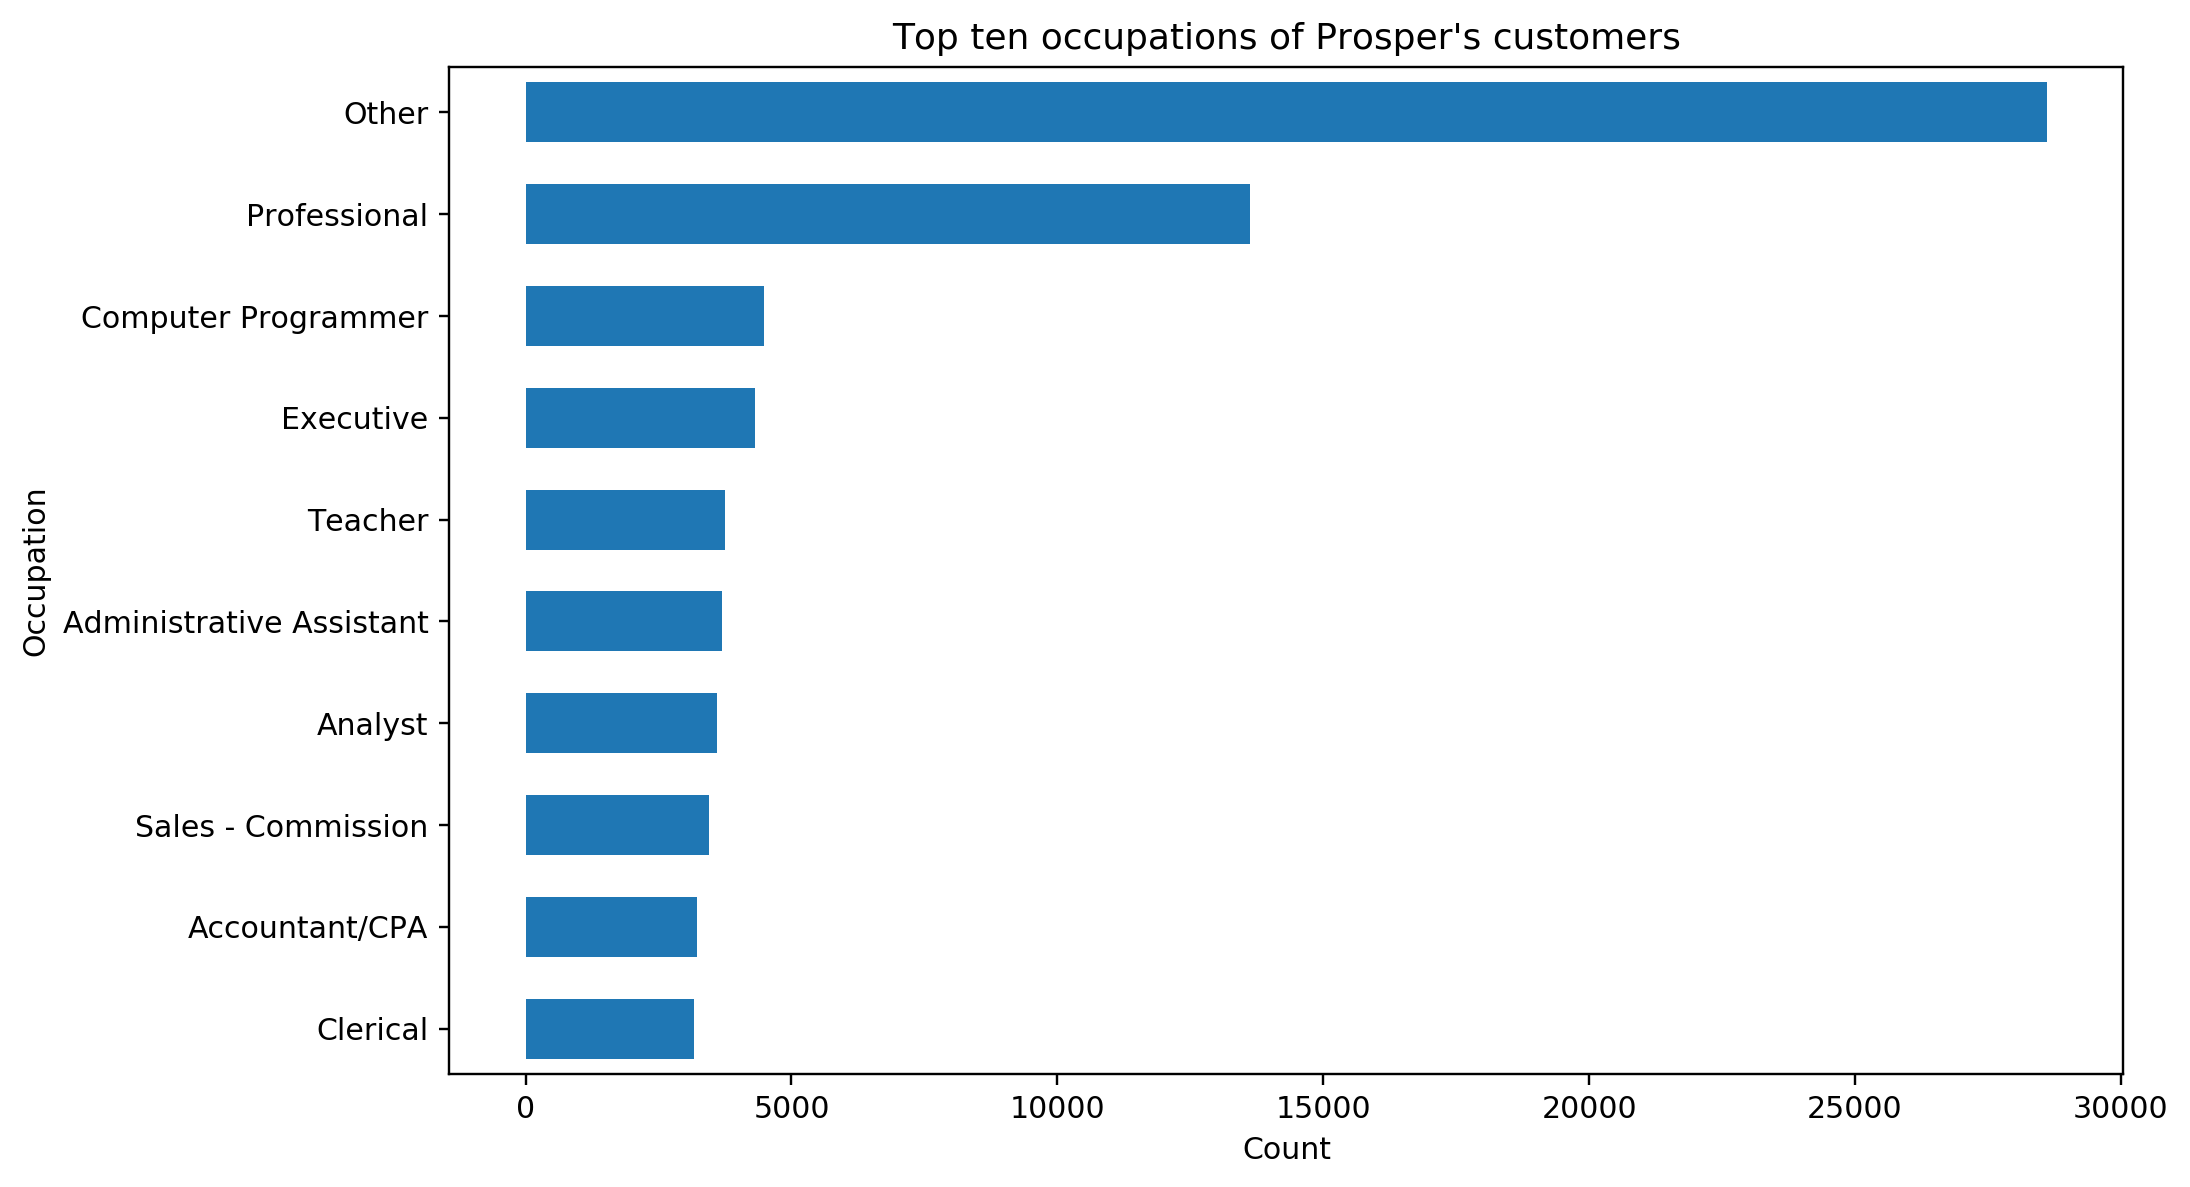

In [18]:
#1. occupation: top ten
y = df.Occupation.value_counts().values[:10]
x = df.Occupation.value_counts().index[:10]

#sort top 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Top ten occupations of Prosper\'s customers' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

Categories `Other` and `Professional`

* `Other` is ambiguous; not quite certain what it represents 
* `Professional`, according to the [US bureau of labour statistics](https://www.bls.gov/ncs/ocs/ocsm/commain.htm), appears to be a collective term

What happens when `Other` and `Professional` are excluded?

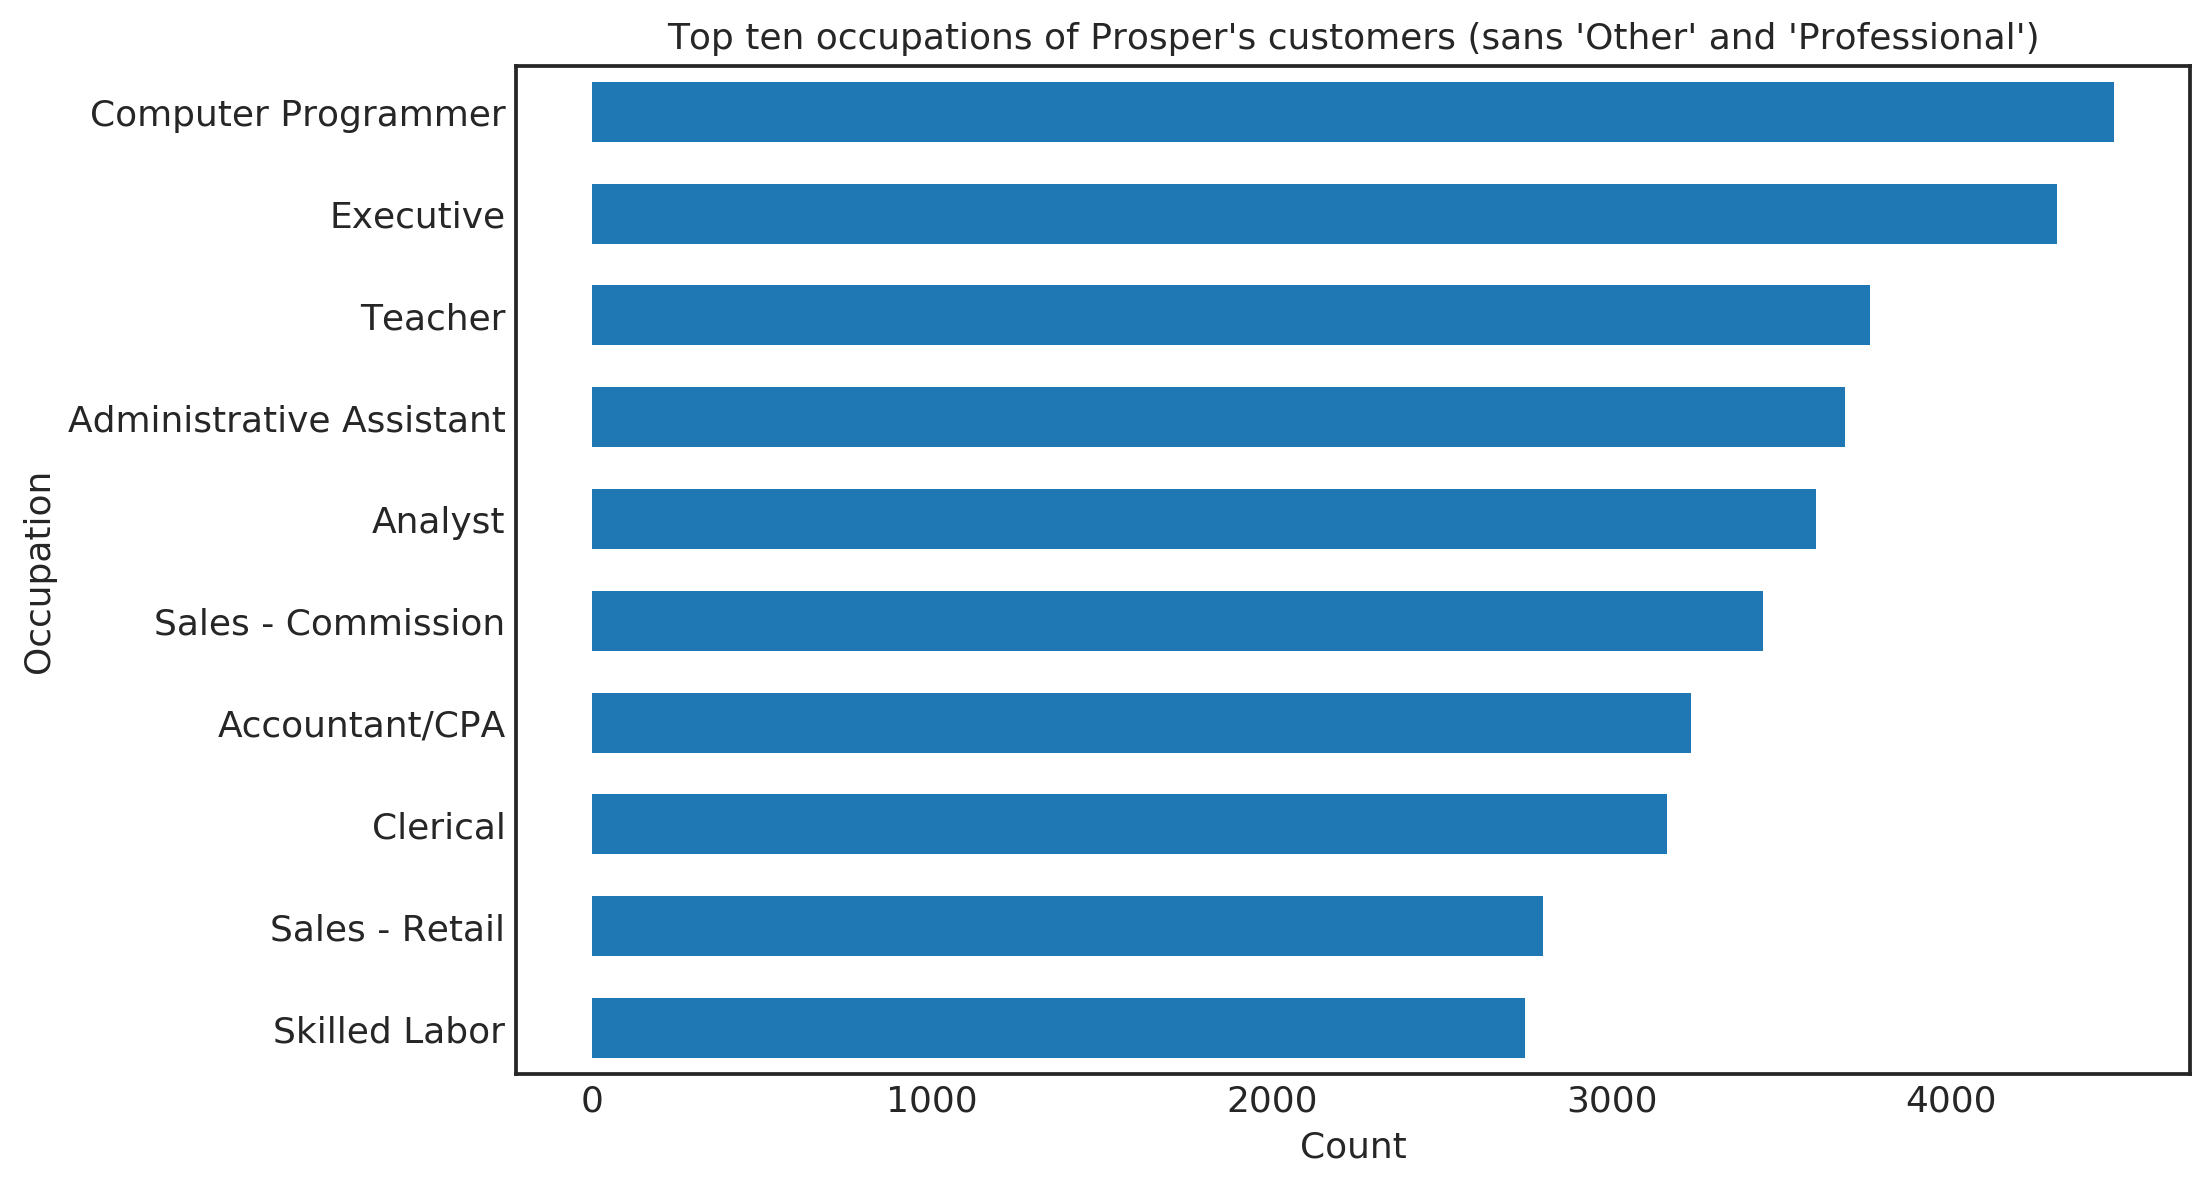

In [91]:
#2. occupation:  top ten sans `Others` and `Professional`
y = df.Occupation.value_counts().values[2:12]
x = df.Occupation.value_counts().index[2:12]

#sort top 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Top ten occupations of Prosper\'s customers (sans \'Other\' and \'Professional\')' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

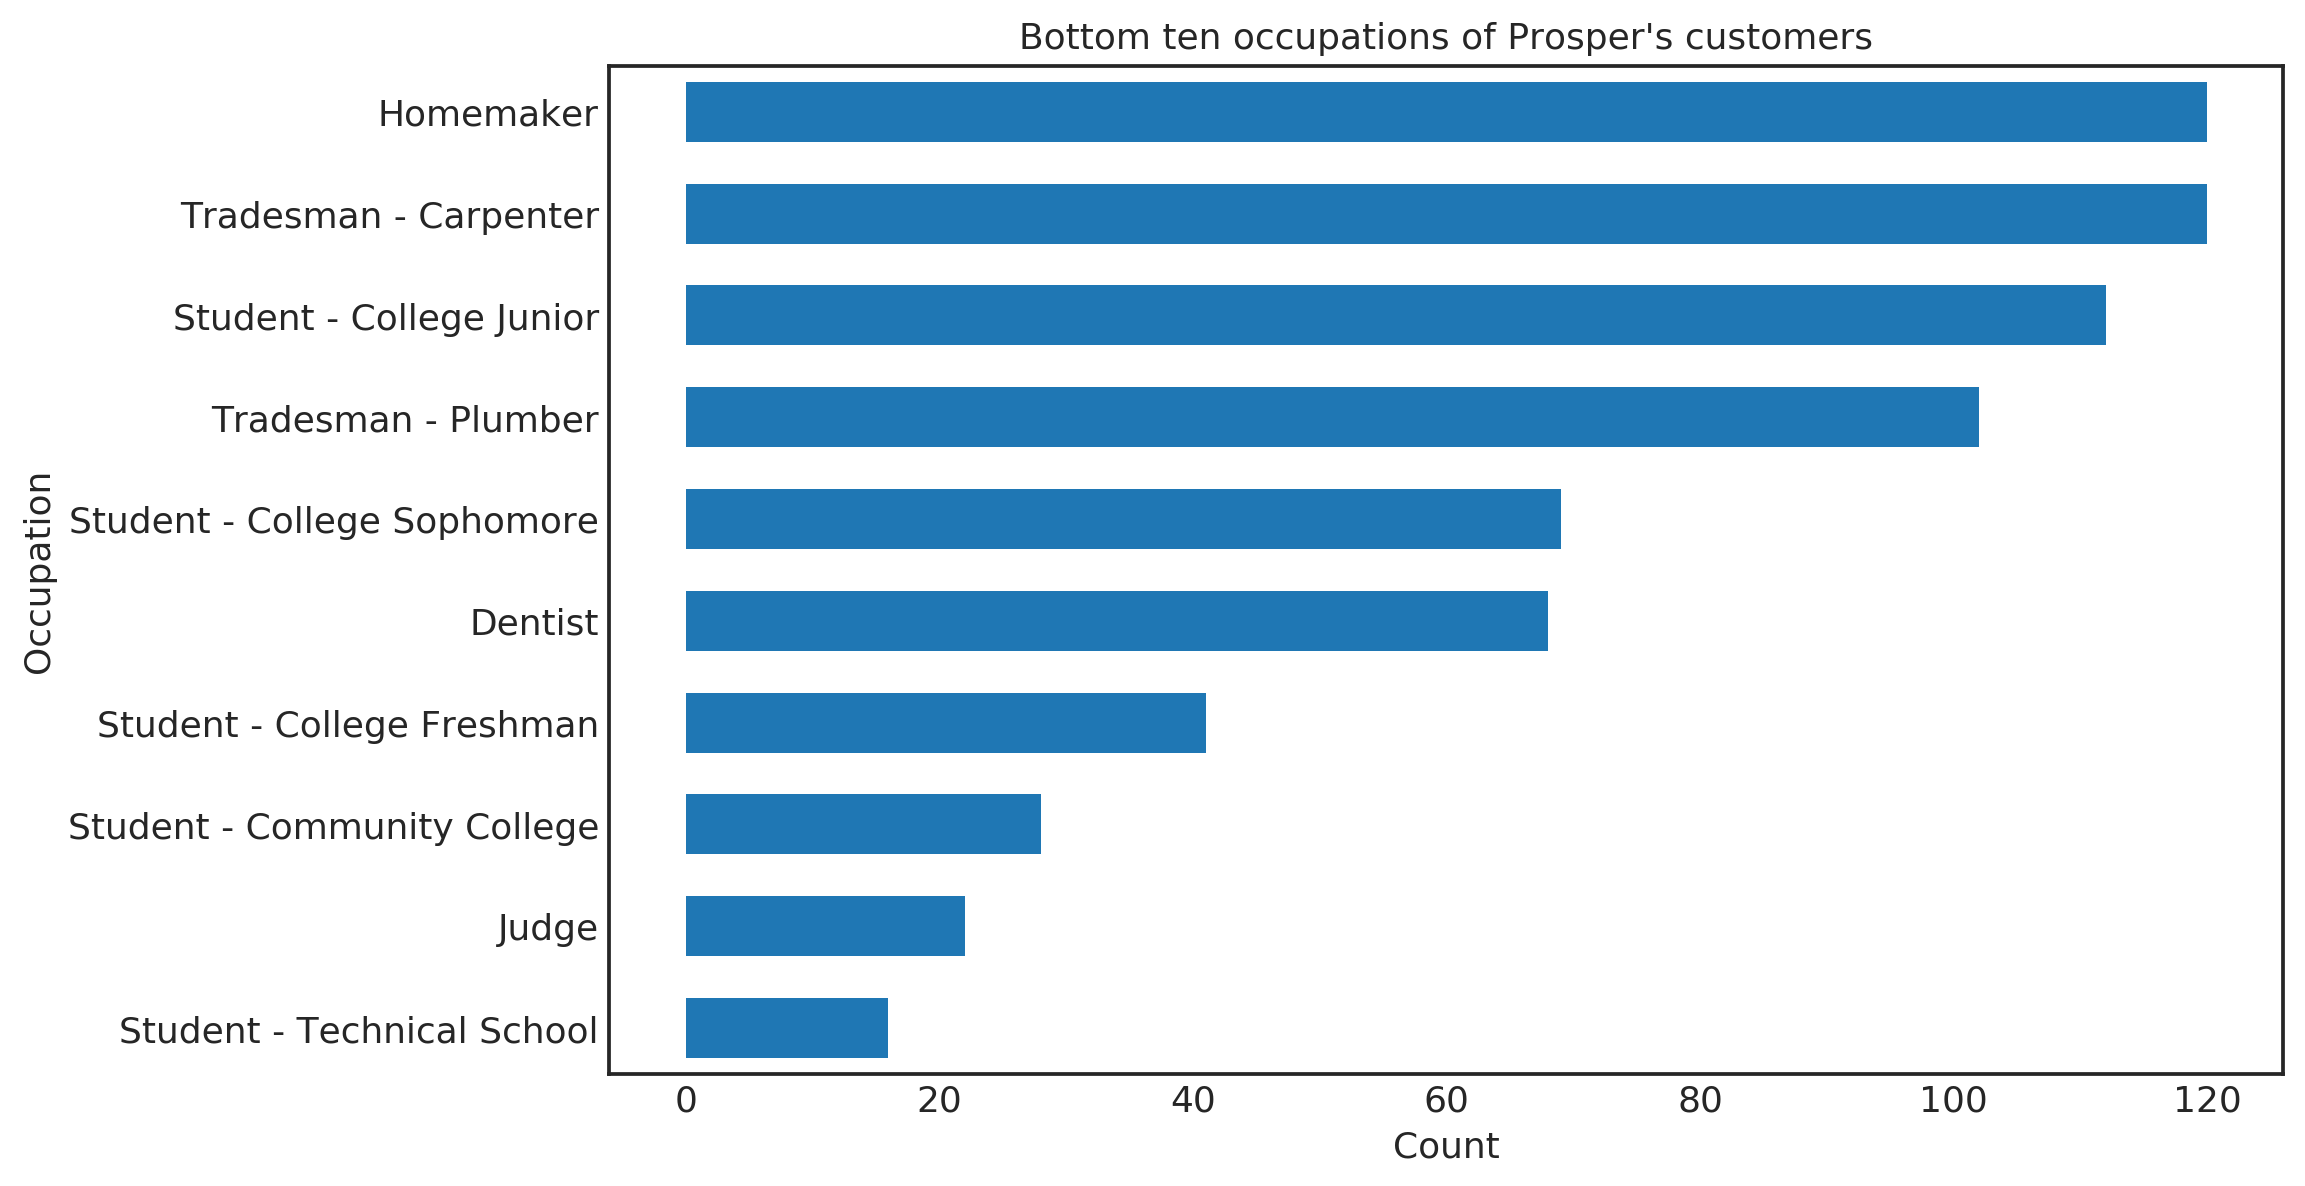

In [90]:
#3. occupation: bottom 10
y = df.Occupation.value_counts().values[-10:]
x = df.Occupation.value_counts().index[-10:]

#sort bottom 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Bottom ten occupations of Prosper\'s customers' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

In [40]:
#show top ten sans 2 unclear categories
y = df.Occupation.value_counts().values[2:12]
x = df.Occupation.value_counts().index[2:12]
top_ten = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
top_ten

Count
Computer Programmer        4478
Executive                  4311
Teacher                    3759
Administrative Assistant   3688
Analyst                    3602
Sales - Commission         3446
Accountant/CPA             3233
Clerical                   3164
Sales - Retail             2797
Skilled Labor              2746

In [41]:
#show bottom ten
y = df.Occupation.value_counts().values[-10:]
x = df.Occupation.value_counts().index[-10:]
bottom_ten = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
bottom_ten

Count
Tradesman - Carpenter          120
Homemaker                      120
Student - College Junior       112
Tradesman - Plumber            102
Student - College Sophomore     69
Dentist                         68
Student - College Freshman      41
Student - Community College     28
Judge                           22
Student - Technical School      16

#### Findings

##### Occupation
* an overwhelming majority of the top ten occupations are [white collar](https://www.investopedia.com/terms/w/whitecollar.asp)
* a majority of the bottom ten occupations, that are not students, are [blue collar](https://www.investopedia.com/terms/b/bluecollar.asp)
* half of the occupations in the bottom ten are students



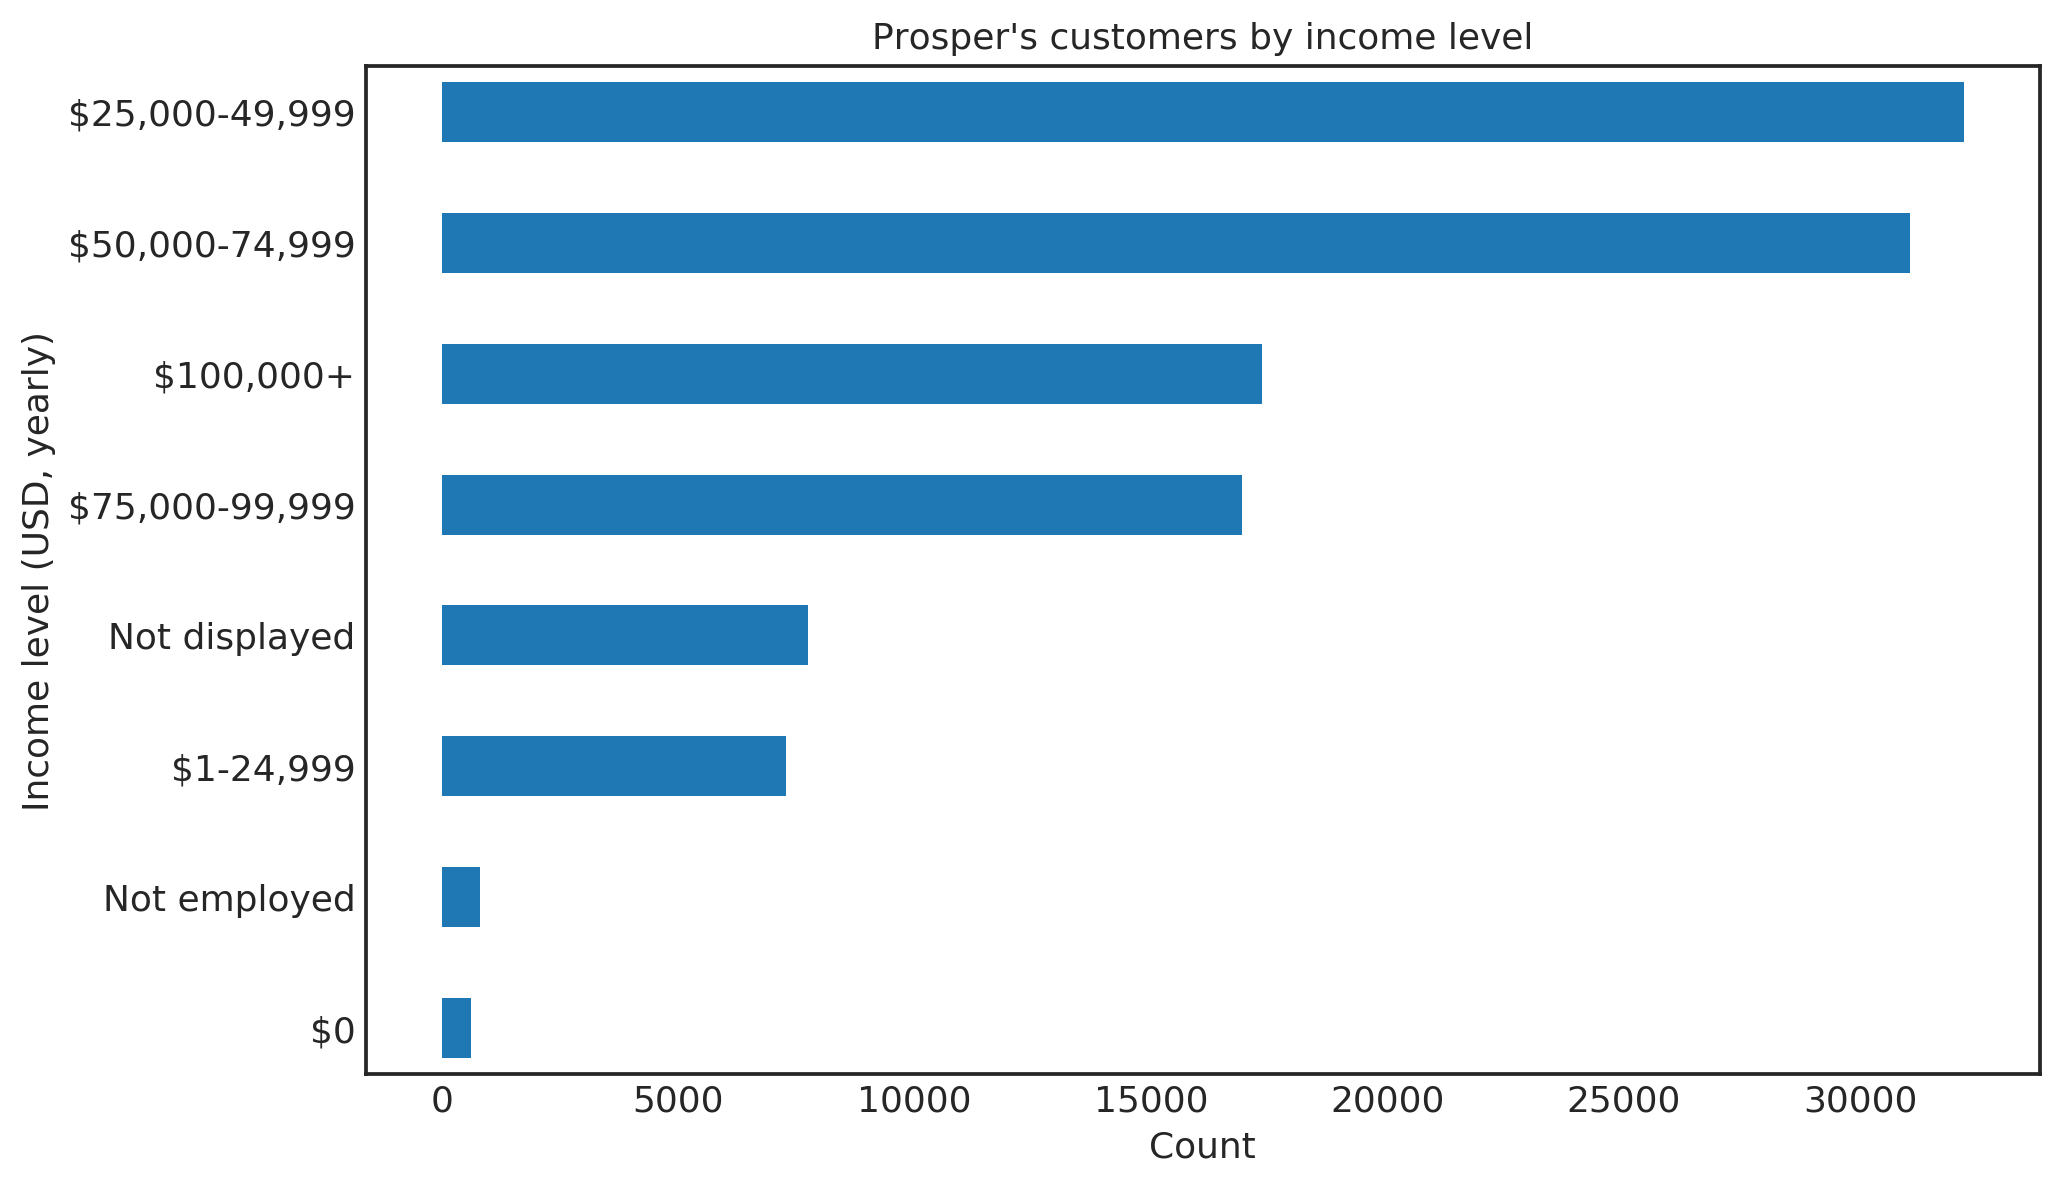

In [88]:
#4. income Levels

y = df.IncomeRange.value_counts().values[:]
x = df.IncomeRange.value_counts().index[:]

#sort income levels
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Income level (USD, yearly)', 'Prosper\'s customers by income level')
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:, 0]);

In [43]:
#show income levels
pd.DataFrame({k:v for (k, v) in zip(x,y)}, index=['Count']).transpose()

Count
$25,000-49,999  32192
$50,000-74,999  31050
$100,000+       17337
$75,000-99,999  16916
Not displayed    7741
$1-24,999        7274
Not employed      806
$0                621

#### Findings

#####  Income level
* an overwhelming majority of loans are issued to those whose income level is above USD 25,000.00 _p.a._
    * the top 2 groups account for 55.8% of loans issued 
    * the top 4 groups account for 85.4% of loans issued
* top 4 income groups by loans issued: 
    * `$25,000-49,999`
    * `$50,000-74,999`
    * `$100,000+`
    * `$75,000-99,999`
* the category `Not displayed` is ambiguous, as such, cannot be interpreted
* prosper lends to unemployed applicants
    * unemployed refers to the category `Not employed`. Not sure if an employee can earn USD 0.00 _p.a._; [this article](https://compensation.blr.com/Compensation-news/Compensation/Deductions-from-Paychecks/zns-Rules-for-deductions-from-pay-Which-can-drop-w/) and [this one](https://www.opm.gov/policy-data-oversight/pay-leave/leave-administration/fact-sheets/leave-without-pay/) have diverging views

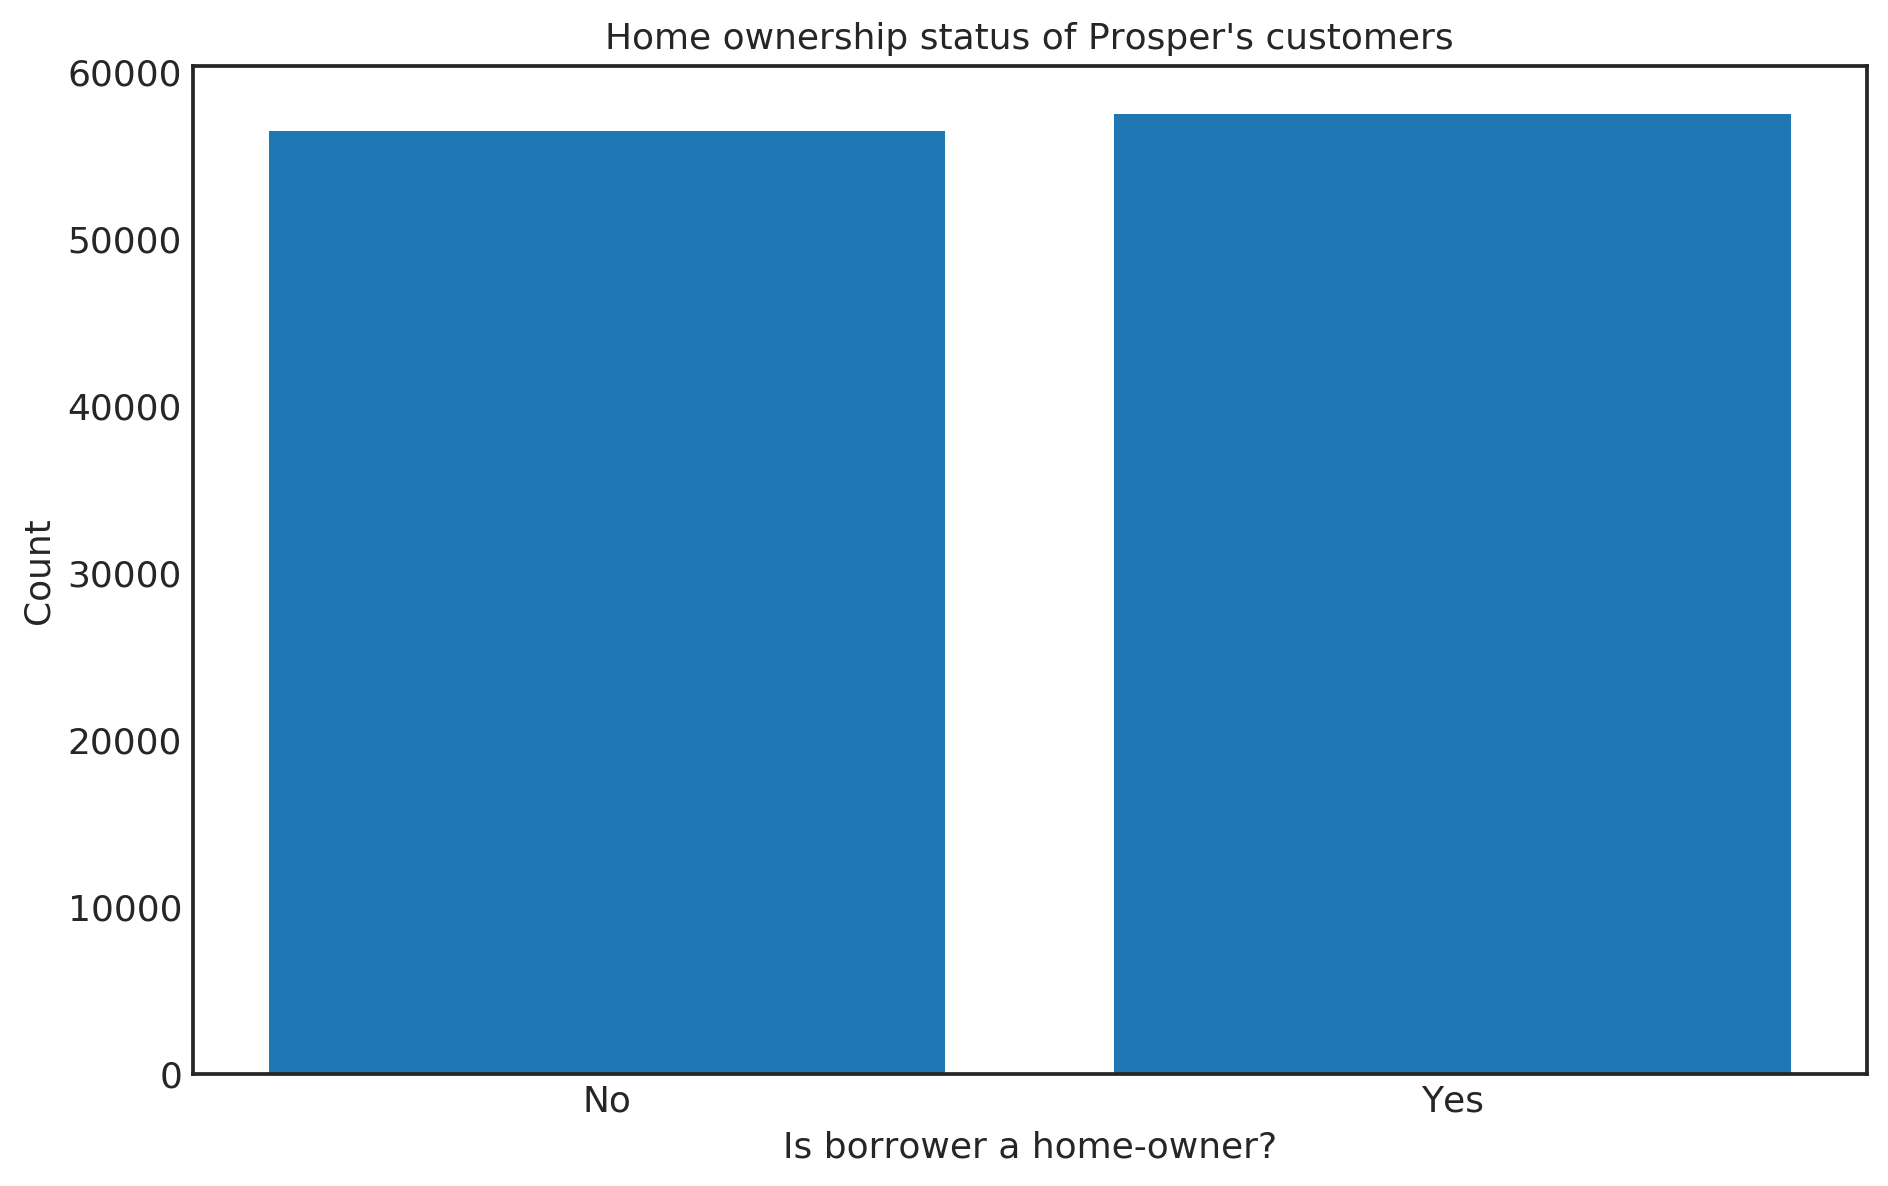

In [75]:
#5. home ownership status

#home ownership: values to plot
y = df.IsBorrowerHomeowner.value_counts().values[:]
x = df.IsBorrowerHomeowner.value_counts().index[:]

#create viz
create_fig('Is borrower a home-owner?', 'Count', 'Home ownership status of Prosper\'s customers')
plt.bar(x, y, color=default_blue)
plt.xticks(np.arange(2), ['No', 'Yes']);

In [45]:
#show home ownership status
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

Count
True   57478
False  56459

#### Findings

#####  Home ownership status
* there is an almost-even split between those that own a home and those that do not
    * 50.4% of borrowers own a home


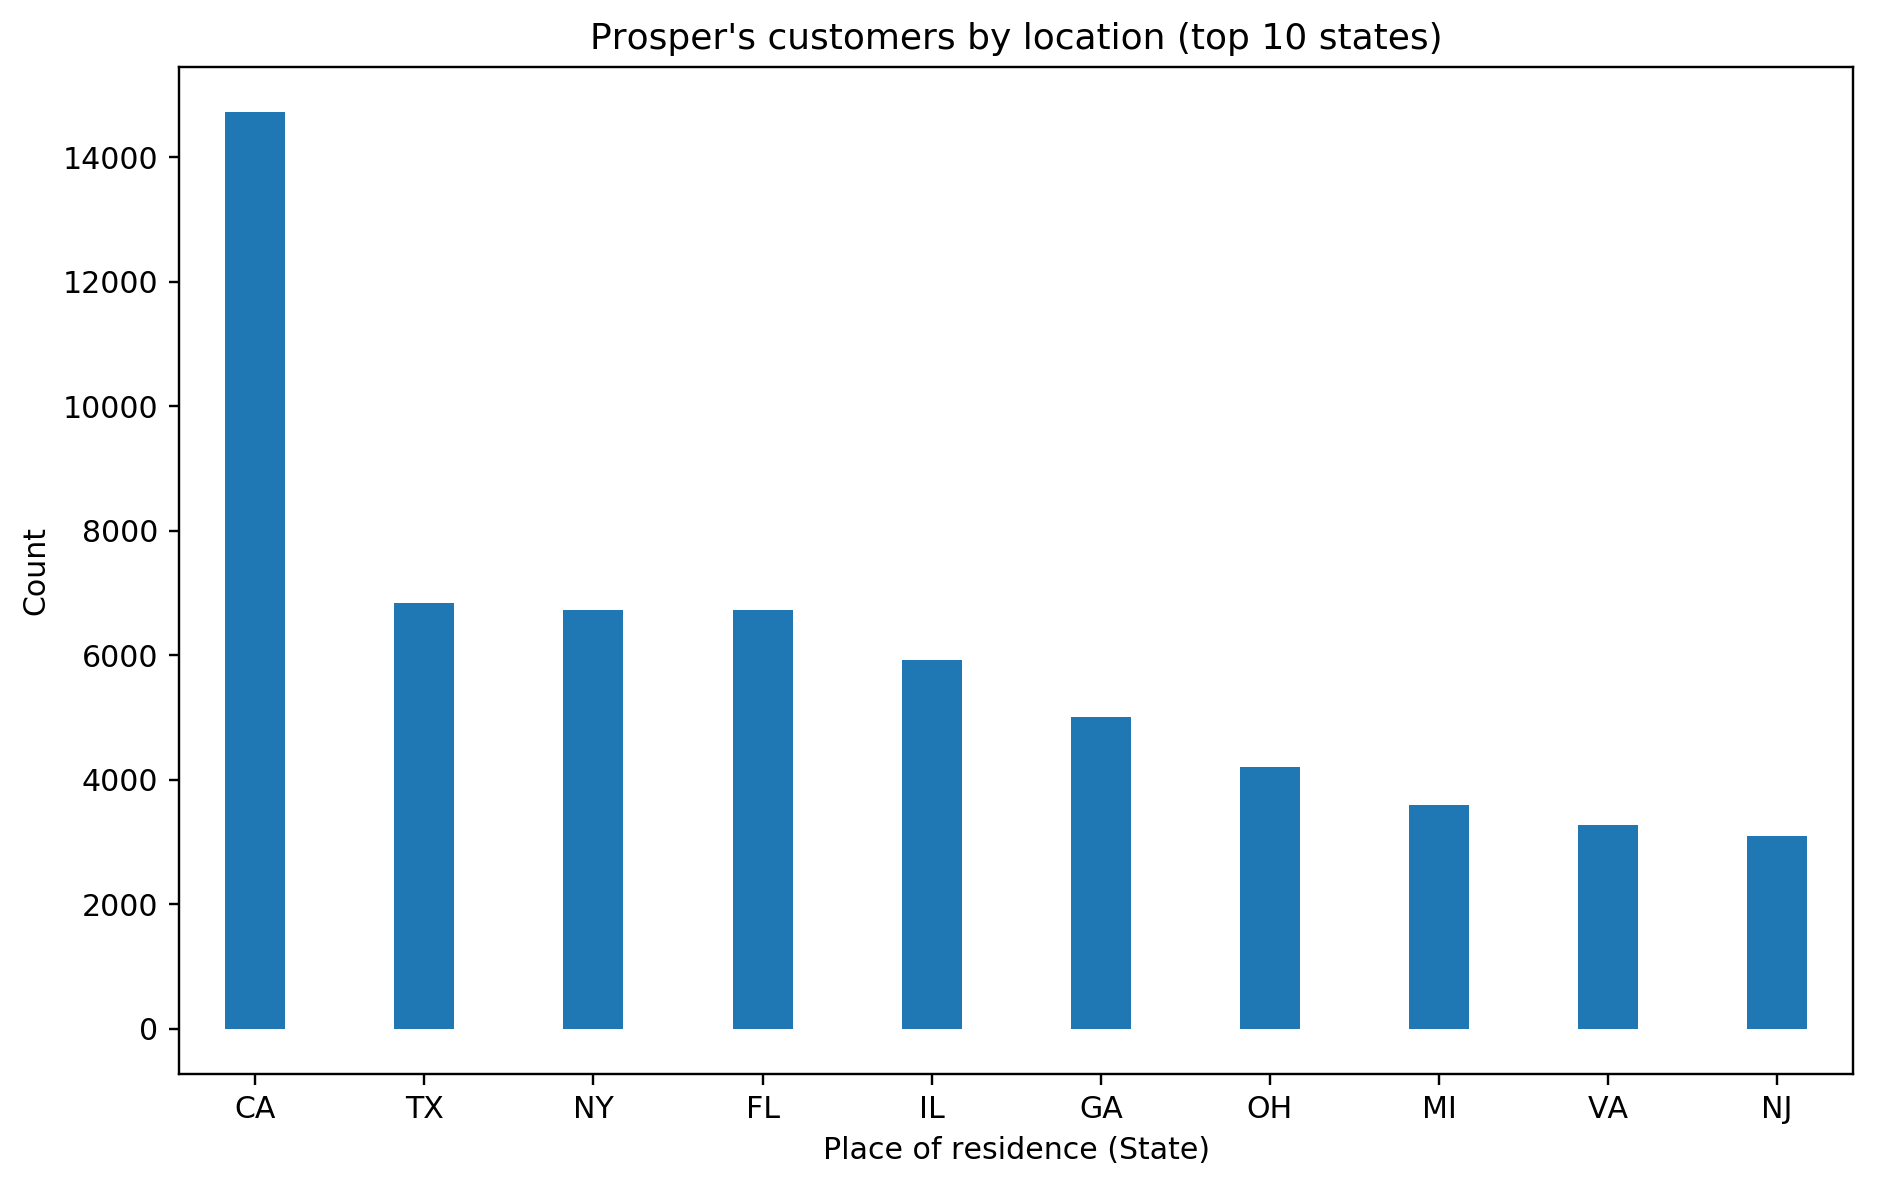

In [21]:
#6. location by state

#state top-ten: values to plot
y = df.BorrowerState.value_counts().values[:10]
x = df.BorrowerState.value_counts().index[:10]

#sort states
dd = custom_sort_df(x, y, ascending=False)

#create viz
create_fig('Place of residence (State)', 'Count', 'Prosper\'s customers by location (top 10 states)')
plt.vlines(x=dd.index, ymin=0, ymax=dd.Count, color=default_blue, linewidth=20)
plt.xticks(np.arange(len(x)), dd.iloc[:, 0]);

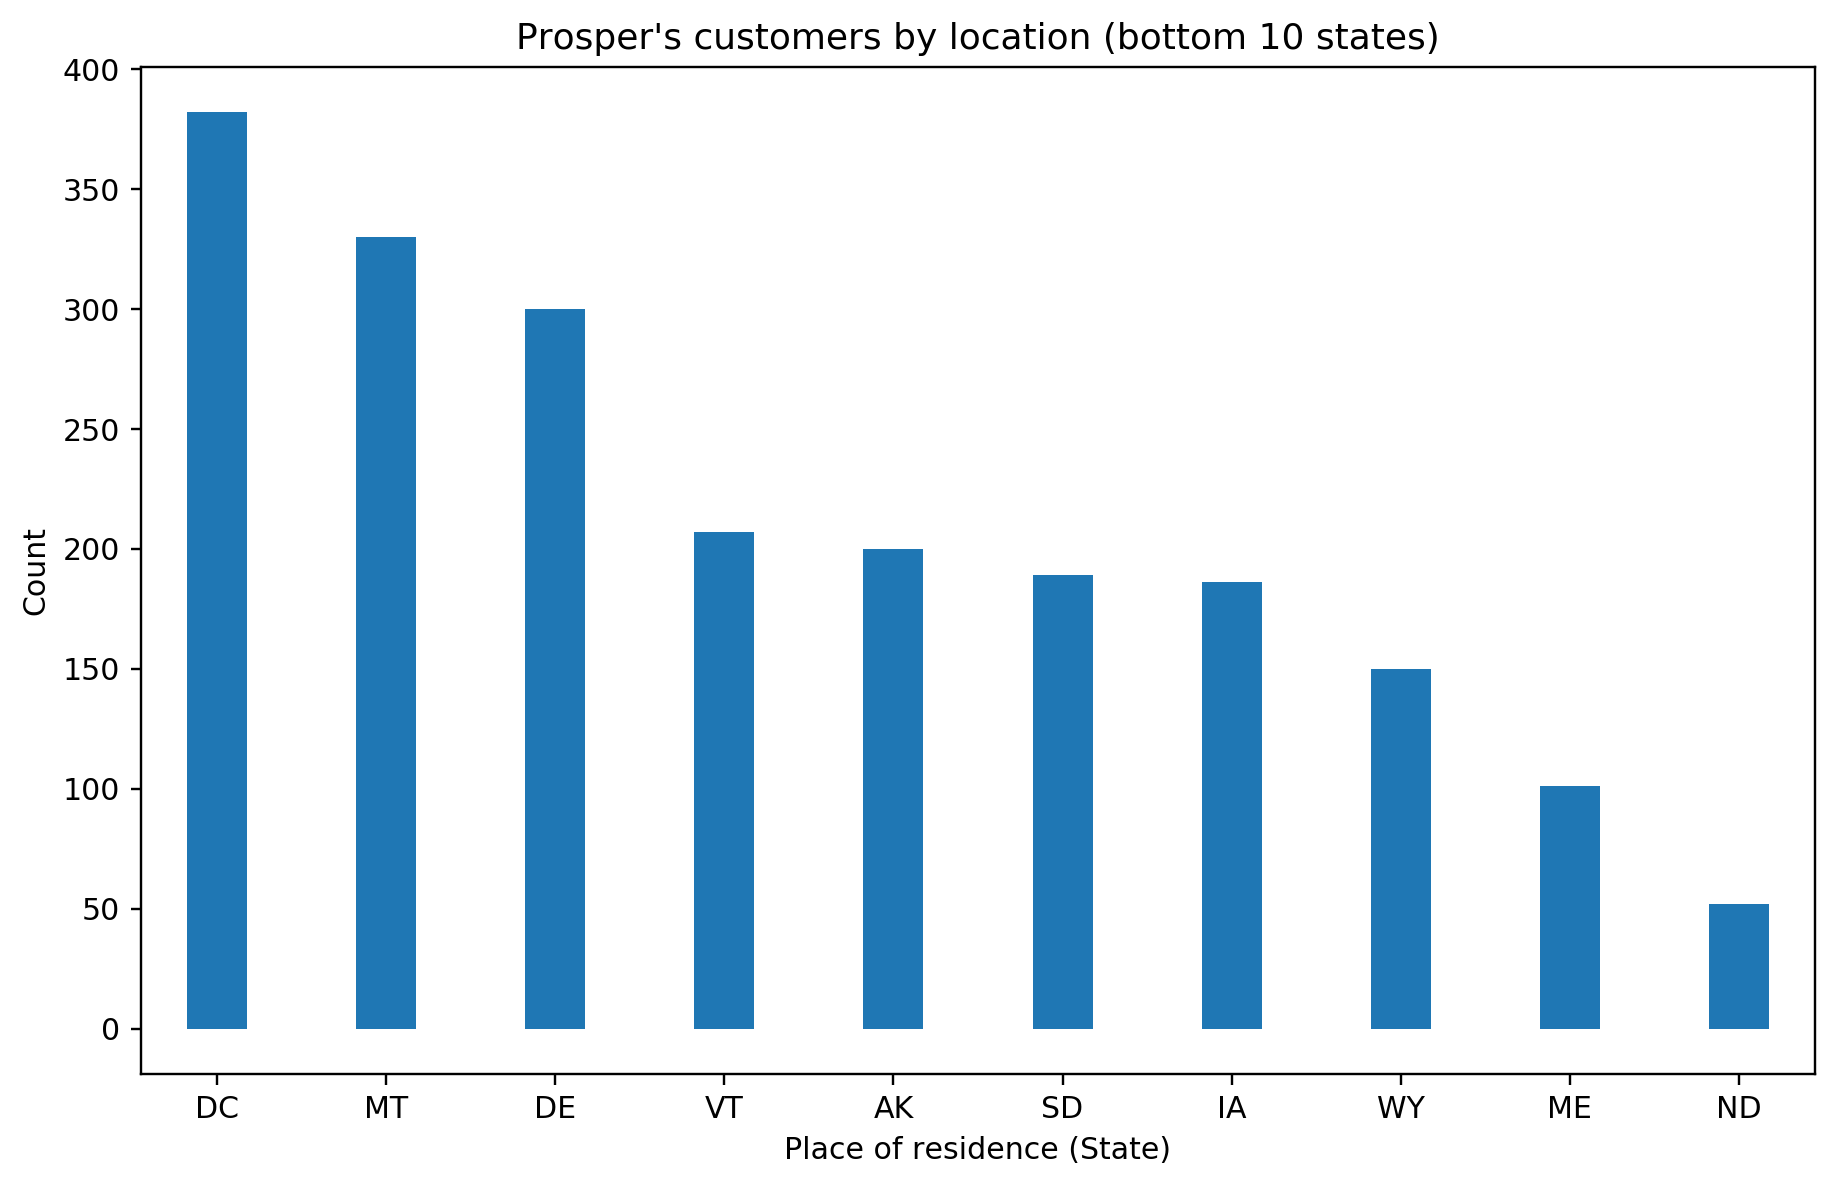

In [22]:
#state bottom ten: values to plot
y = df.BorrowerState.value_counts().values[-10:]
x = df.BorrowerState.value_counts().index[-10:]

#sort states
dd = custom_sort_df(x, y, ascending=False)

#create viz
create_fig('Place of residence (State)', 'Count', 'Prosper\'s customers by location (bottom 10 states)')
plt.vlines(x=dd.index, ymin=0, ymax=dd.Count, color=default_blue, linewidth=20)
plt.xticks(np.arange(len(x)), dd.iloc[:, 0]);

In [48]:
#show top ten
y = df.BorrowerState.value_counts().values[:10]
x = df.BorrowerState.value_counts().index[:10]
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

Count
CA  14717
TX   6842
NY   6729
FL   6720
IL   5921
GA   5008
OH   4197
MI   3593
VA   3278
NJ   3097

In [49]:
#show bottom ten
y = df.BorrowerState.value_counts().values[-10:]
x = df.BorrowerState.value_counts().index[-10:]
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

Count
DC    382
MT    330
DE    300
VT    207
AK    200
SD    189
IA    186
WY    150
ME    101
ND     52

#### Findings

##### State
* the state of California has the most borrowers
* the state of North Dakota has the least borrowers
* a majority of the states with the least borrowers are from the so-called "[fly-over country](https://en.wikipedia.org/wiki/Flyover_country)"
* all of the states in the top ten list have a [large population](https://data.census.gov/cedsci/table?tid=PEPPOP2021.NST_EST2021_POP&hidePreview=false)



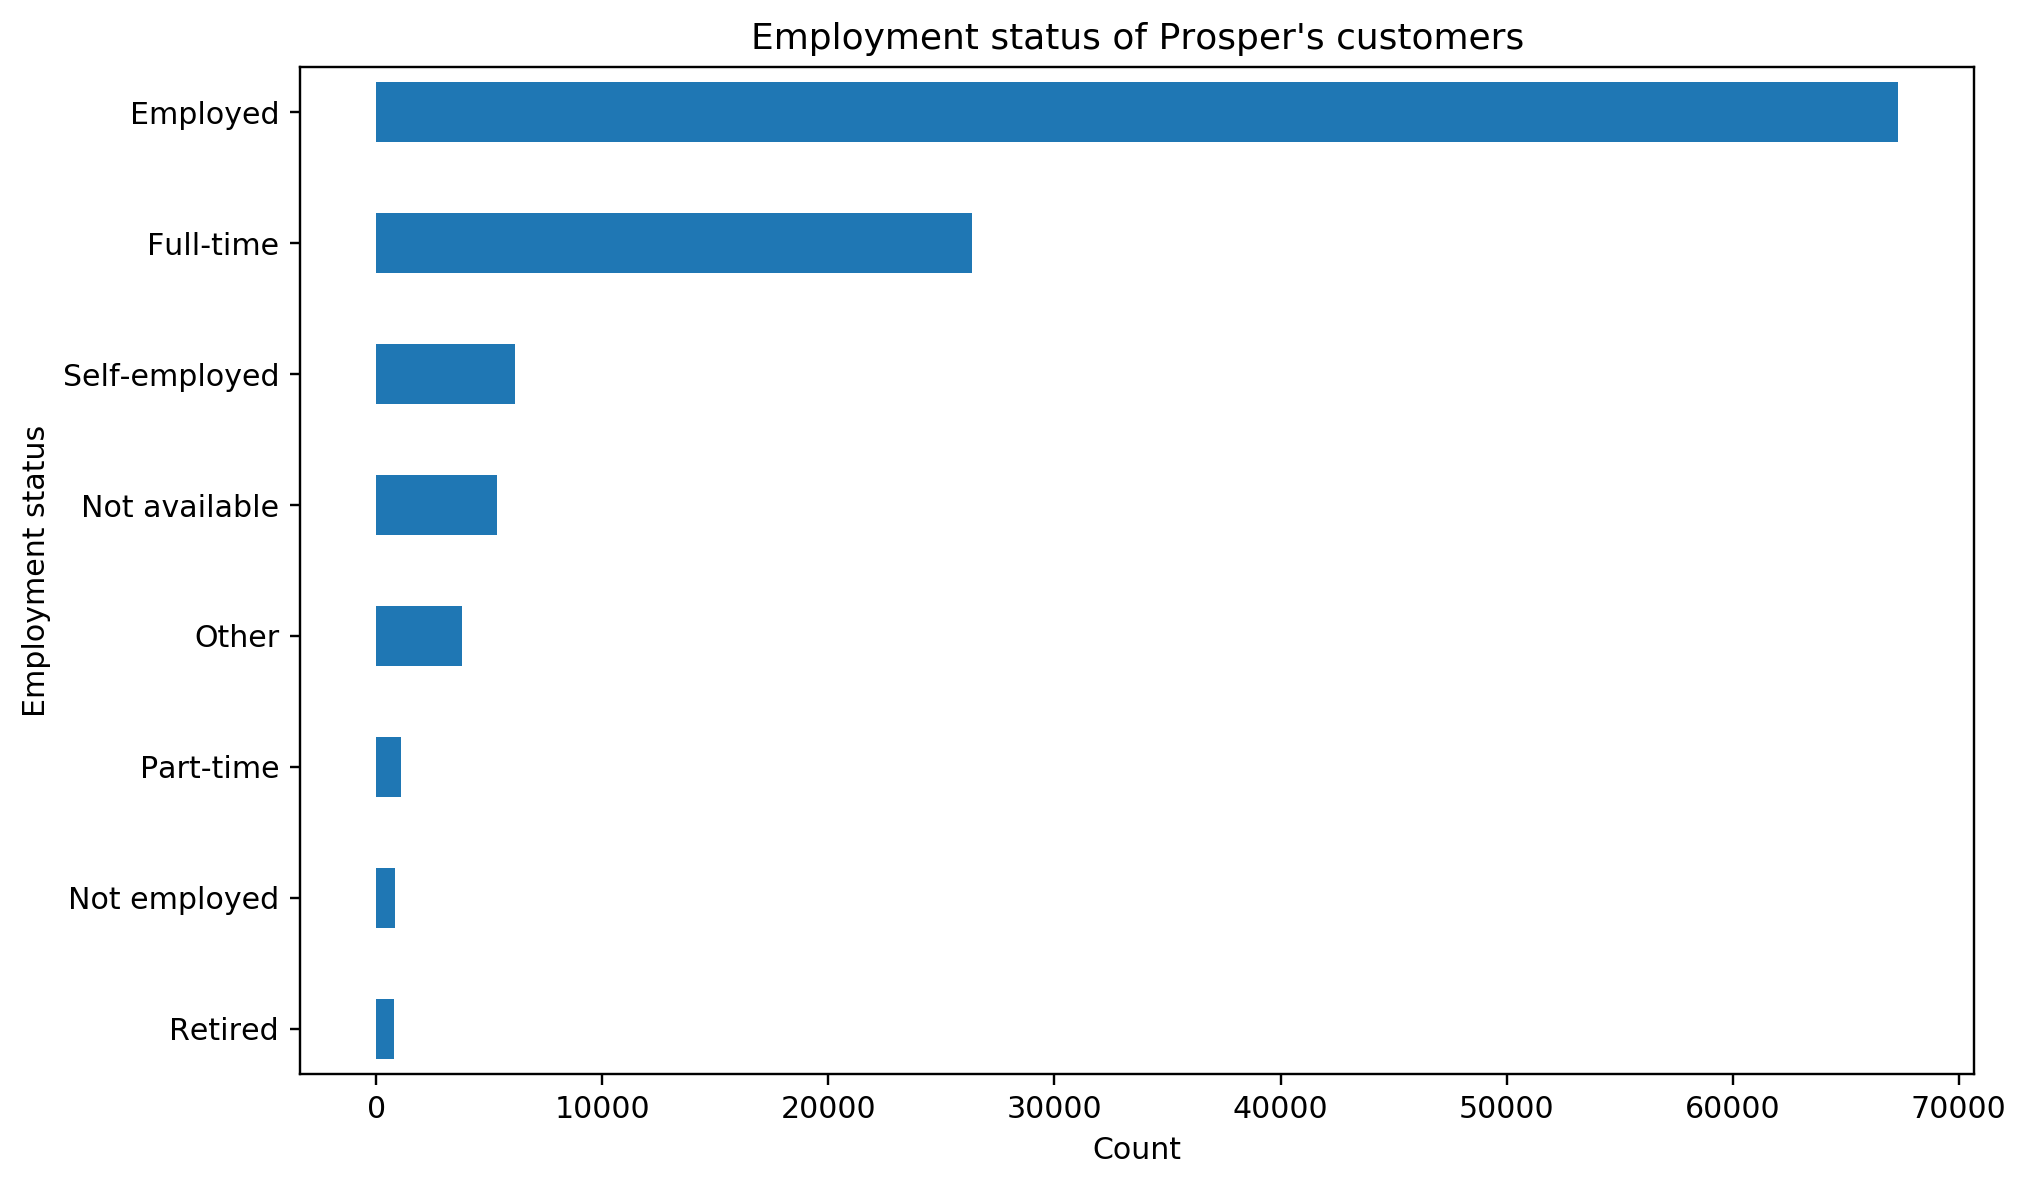

In [27]:
#7 employment status

#employment status: values to plot
y = df.EmploymentStatus.value_counts().values[:]
x = df.EmploymentStatus.value_counts().index[:]

#sort income levels
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Employment status', 'Employment status of Prosper\'s customers')
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:, 0]);

`Employed` is ambiguous; does it mean:
   * `Full-time`, `Part-time` or `Self-employed`
   * any combination of the three

Is it to be treated as its own category?
   * Cannot tell from the description of variables or upon examination of variable `EmploymentStatus`

#### Findings

##### Employment status
* an overwhelming majority of borrowers are employed


<div id="bivar"></div>

## Bivariate Exploration

### Will follow the [method](#method) used in [univariate exploration](#univar)

### Question #5

##### What affects the `BorrowerRate`?
   * `BorrowerRate` was discussed in [Question #2](#q2)
   * emphasis on term, APR, income level and duration of employment status
   * scatter plots of `BorrowerRate` against:
        * term of loans
        * annual per-centage rate
        * stated monthly income
        * employment status duration

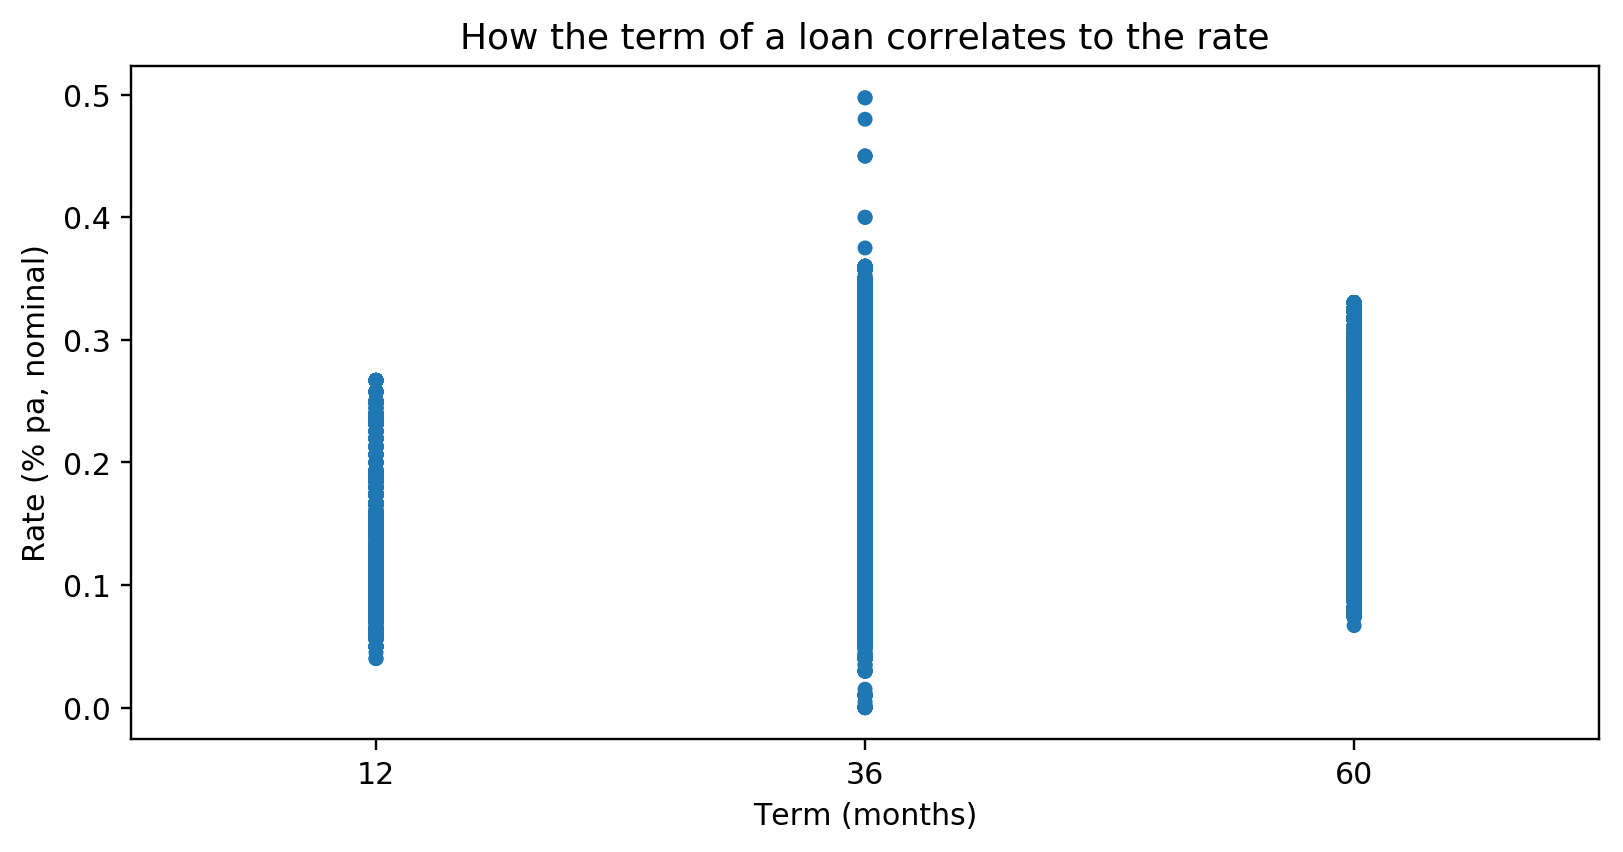

In [24]:
#1. term

#see correlation between `Term` and `BorrowerRate`
fig, ax = create_sub()
sns.stripplot(df.Term, df.BorrowerRate, color=default_blue)

#title
plt.title('How the term of a loan correlates to the rate')

#labels
plt.xlabel('Term (months)')
plt.ylabel('Rate (% pa, nominal)');

#### Findings

##### Term 

* values are clustered around 12, 36 and 60 months
* the term `36 months` has the highest spread (range, if you like)
* the term `12 months` has the lowest spread


The data points are clustered; what happens when they are jittered?
   * will use colour for ease of interpretation

In [33]:
#correlation matrix of `Term` and `BorrowerRate`
corr_df = pd.DataFrame([df.Term, df.BorrowerRate]).transpose()
corr_df.corr()

Term  BorrowerRate
Term          1.000000      0.020085
BorrowerRate  0.020085      1.000000

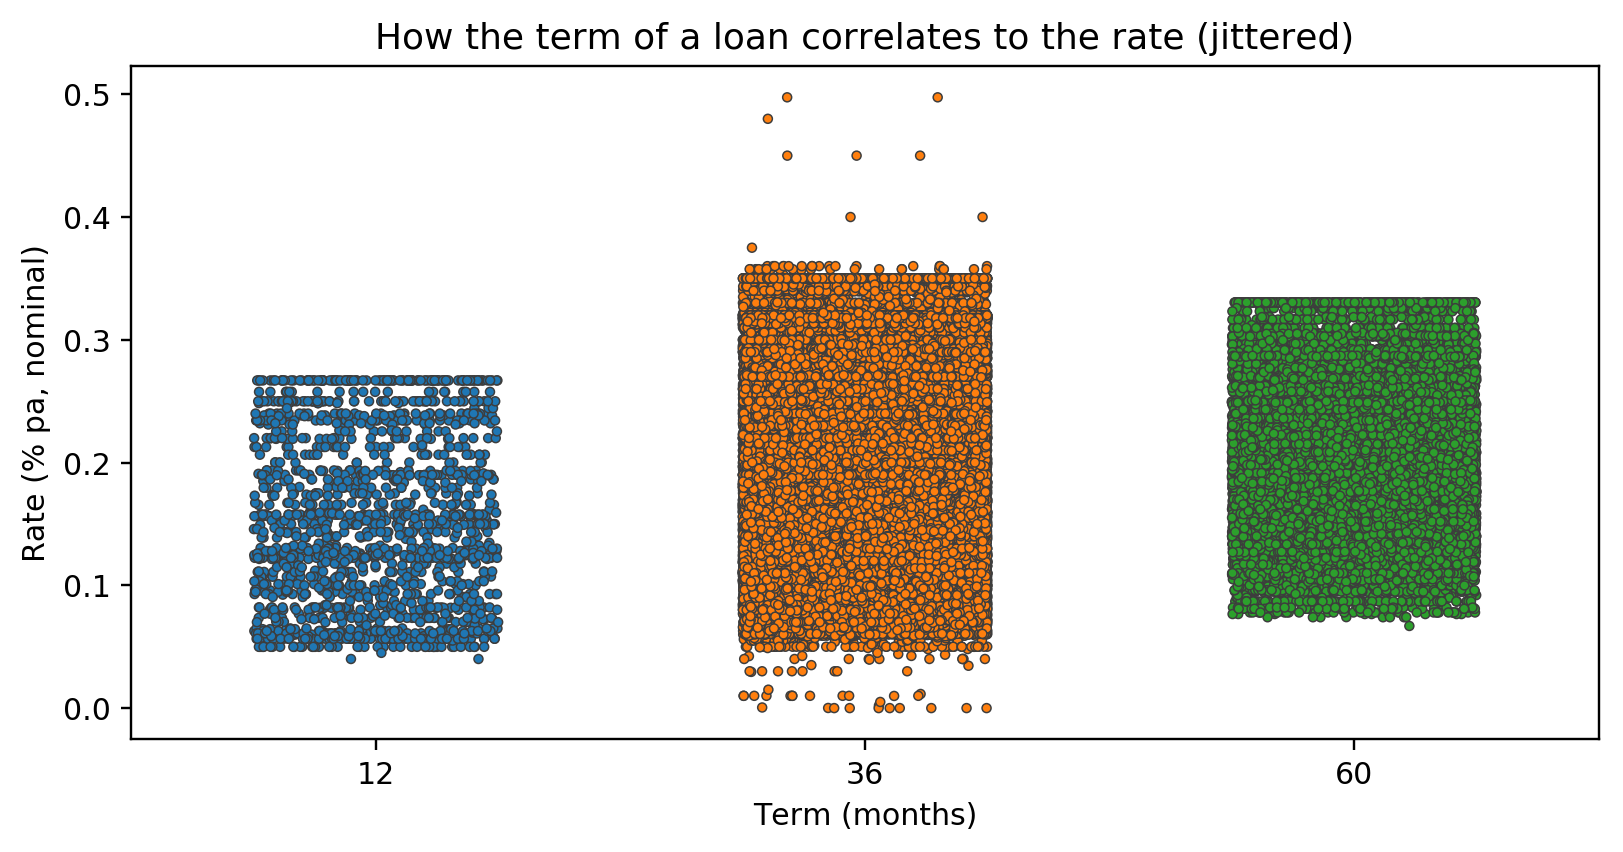

In [26]:
#jittered stripplot for `BorrowerRate` against `Term`

fig, ax = create_sub()
sns.stripplot(df.Term, df.BorrowerRate, jitter=0.25, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the term of a loan correlates to the rate (jittered)')

#labels
plt.xlabel('Term (months)')
plt.ylabel('Rate (% pa, nominal)');

###### what happens when data points are jittered...
* the edges of the clusters are clearer
    * an overwhelming majority of loans of all terms are in the range 0.05% to 0.35%
* values for `Term` = 12 months are not as dense (tightly packed, if you like) as, say, `Term` = 36 months
    * majority of the tenure of the loans is 3 years or more
* there are unusually high and low rates at `Term` = 36 months
* correlation between `Term` and `BorrowerRate`
    * the correlation co-efficient is _c._ 0.02; it shows very weak, positive correlation

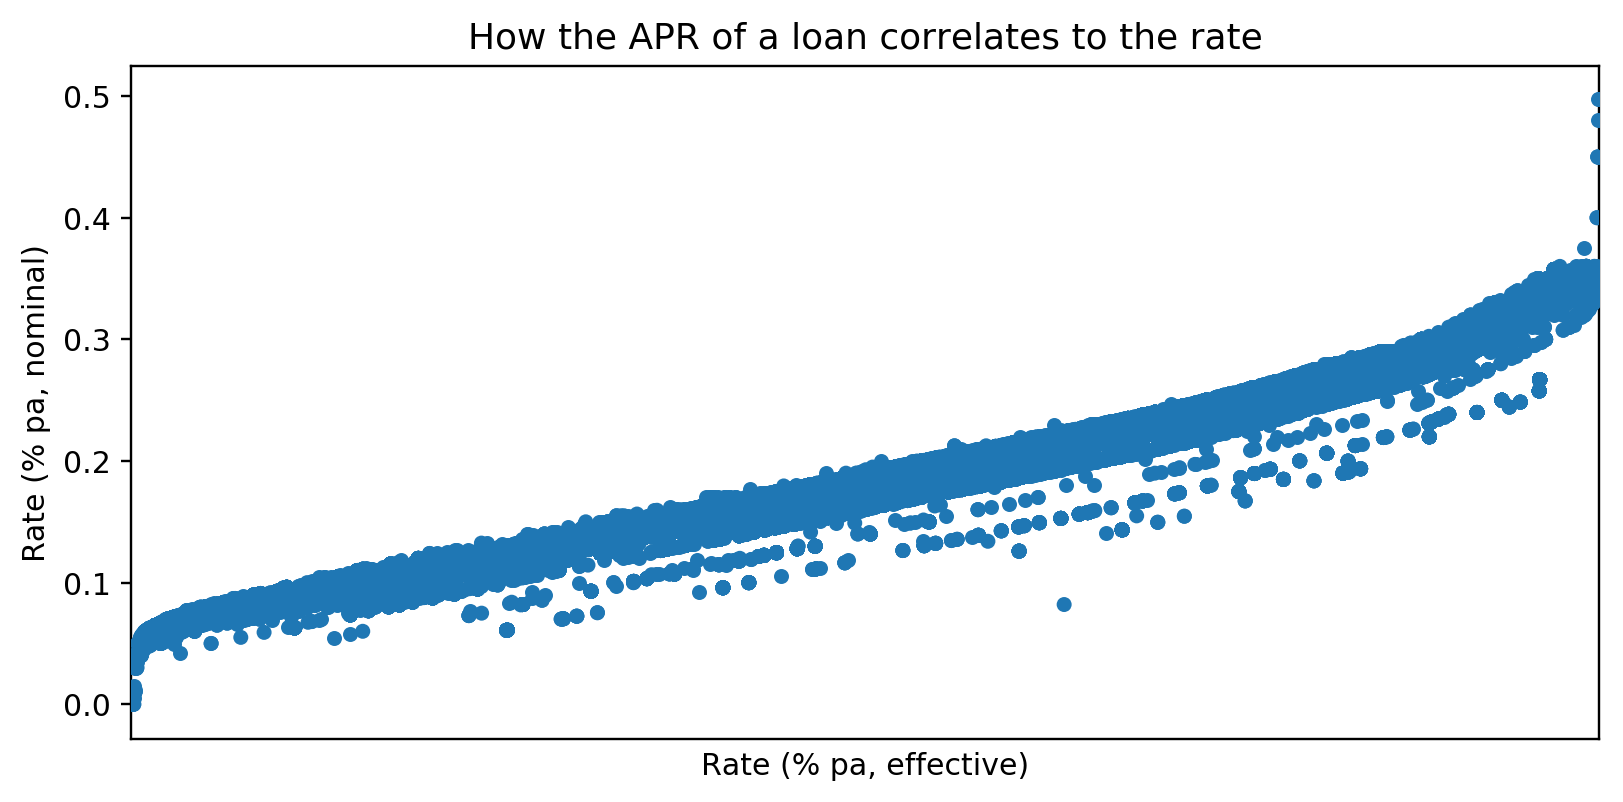

In [32]:
#2. APR

#see correlation between `BorrowerAPR` and `BorrowerRate`
fig, ax = create_sub()
sns.stripplot(df.BorrowerAPR, df.BorrowerRate, color=default_blue)

#title
plt.title('How the APR of a loan correlates to the rate')

#labels
plt.xlabel('Rate (% pa, effective)')
plt.ylabel('Rate (% pa, nominal)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

In [31]:
#correlation matrix of `BorrowerAPR` and `BorrowerRate`
corr_df = pd.DataFrame([df.BorrowerAPR, df.BorrowerRate]).transpose()
corr_df.corr()

BorrowerAPR  BorrowerRate
BorrowerAPR      1.000000      0.989824
BorrowerRate     0.989824      1.000000

#### Findings

##### Annual Percentage Rate
* there is a positive correlation between `BorrowerAPR` and `BorrowerRate`
    * this, according to [this article](https://corporatefinanceinstitute.com/resources/knowledge/finance/annual-percentage-rate-apr/) is the norm
* the positive correlation is very strong (_c._ 0.99)
* there is interesting behaviour at the extremes
    * low effective rates have quite low nominal rates and vice versa
    
what happens when data points are jittered?

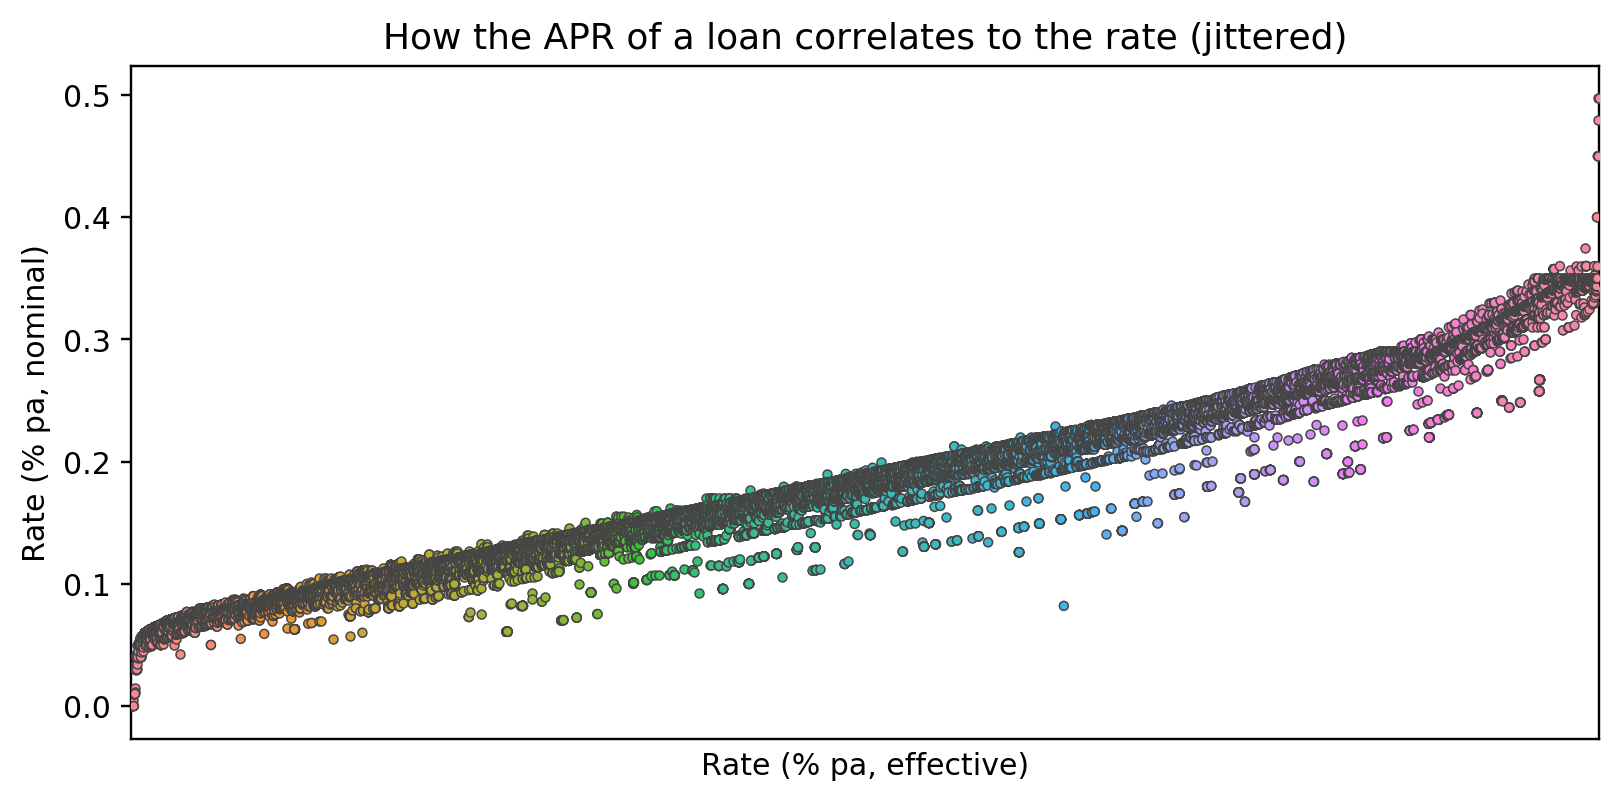

In [34]:
#jittered stripplot for `BorrowerRate` against `BorrowerAPR`

fig, ax = create_sub()
sns.stripplot(df.BorrowerAPR, df.BorrowerRate, jitter=1.5, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the APR of a loan correlates to the rate (jittered)')

#labels
plt.xlabel('Rate (% pa, effective)')
plt.ylabel('Rate (% pa, nominal)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

##### what happens when data points are jittered...

* outliers present themselves
    * example: the value that is below 0.1% while the rest are at least 0.1%

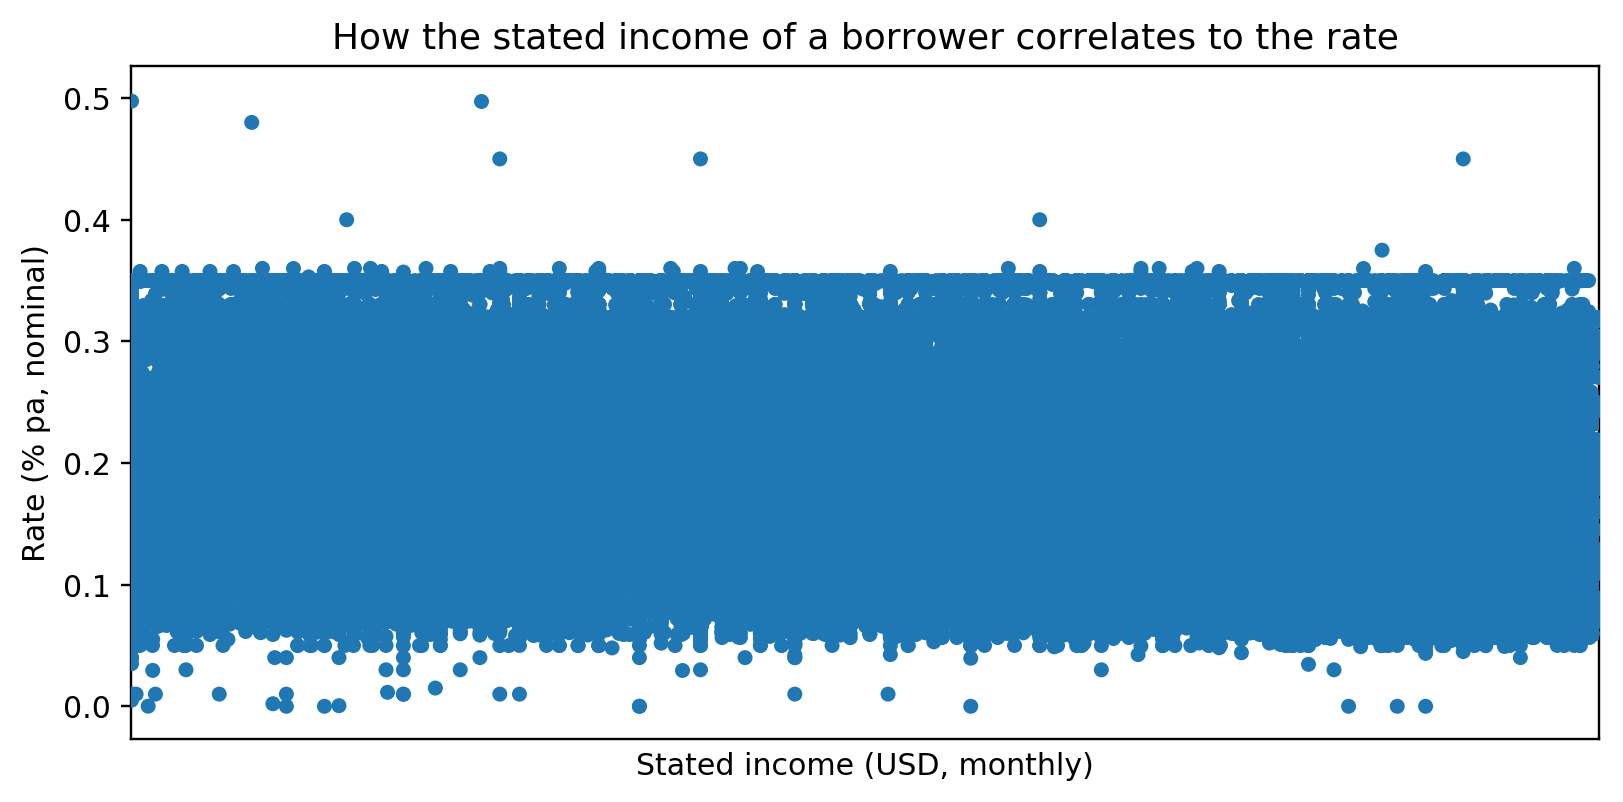

In [39]:
#3. stated monthly income

#see correlation between `StatedMonthlyIncome` and `BorrowerRate`
fig, ax = create_sub()
sns.stripplot(df.StatedMonthlyIncome, df.BorrowerRate, color=default_blue)

#title
plt.title('How the stated income of a borrower correlates to the rate')

#labels
plt.xlabel('Stated income (USD, monthly)')
plt.ylabel('Rate (% pa, nominal)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

In [14]:
#correlation matrix of `StatedMonthlyIncome` and `BorrowerRate`
corr_df = pd.DataFrame([df.StatedMonthlyIncome, df.BorrowerRate]).transpose()
corr_df.corr()

StatedMonthlyIncome  BorrowerRate
StatedMonthlyIncome             1.000000     -0.088982
BorrowerRate                   -0.088982      1.000000

#### Findings

###### Stated monthly income
* `BorrowerRate` is clustered at the range 0.05% to 0.35% for all levels of `StatedMonthlyIncome`
* correlation is not clear from the visualisation
    * will jitter the data points for visual clarity
    * there is very weak, negative correlation (_c._ -0.09) according to the correlation matrix
* there are outliers at all levels of `StatedMonthlyIncome`
    * there are a few unusually high and low rates

what happens whan data points are jittered?

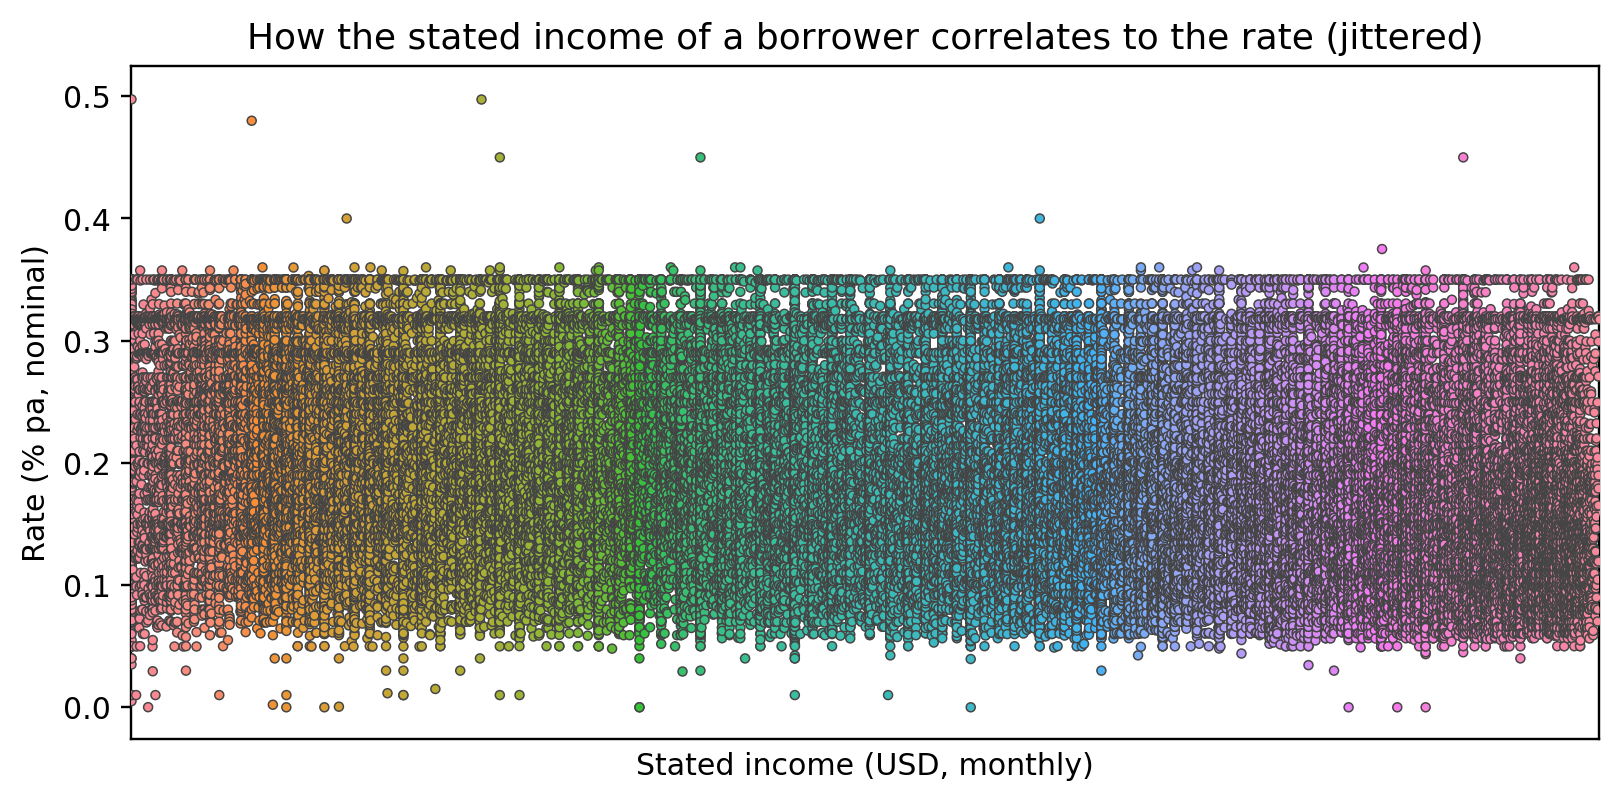

In [50]:
#jittered stripplot for `BorrowerRate` against `StatedMonthlyIncome`

fig, ax = create_sub()
sns.stripplot(df.StatedMonthlyIncome, df.BorrowerRate, jitter=0.5, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the stated income of a borrower correlates to the rate (jittered)')

#labels
plt.xlabel('Stated income (USD, monthly)')
plt.ylabel('Rate (% pa, nominal)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

###### what happens when data points are jittered...

* edges become clearer
    * the upper bound at the 0.35% rate can be seen
    * at lower rate levels (0.0% - 0.05%), there are more observations of low income than high income
* trends begin to appear
    * data points form lines at 0.35%, 0.325%, 0.29%, 0.15% and 0.1%
    * the bottom right of the cluster, that is, the region of high income and low rates, is quite dense
        * the number of data points here apprears to be more-than-average

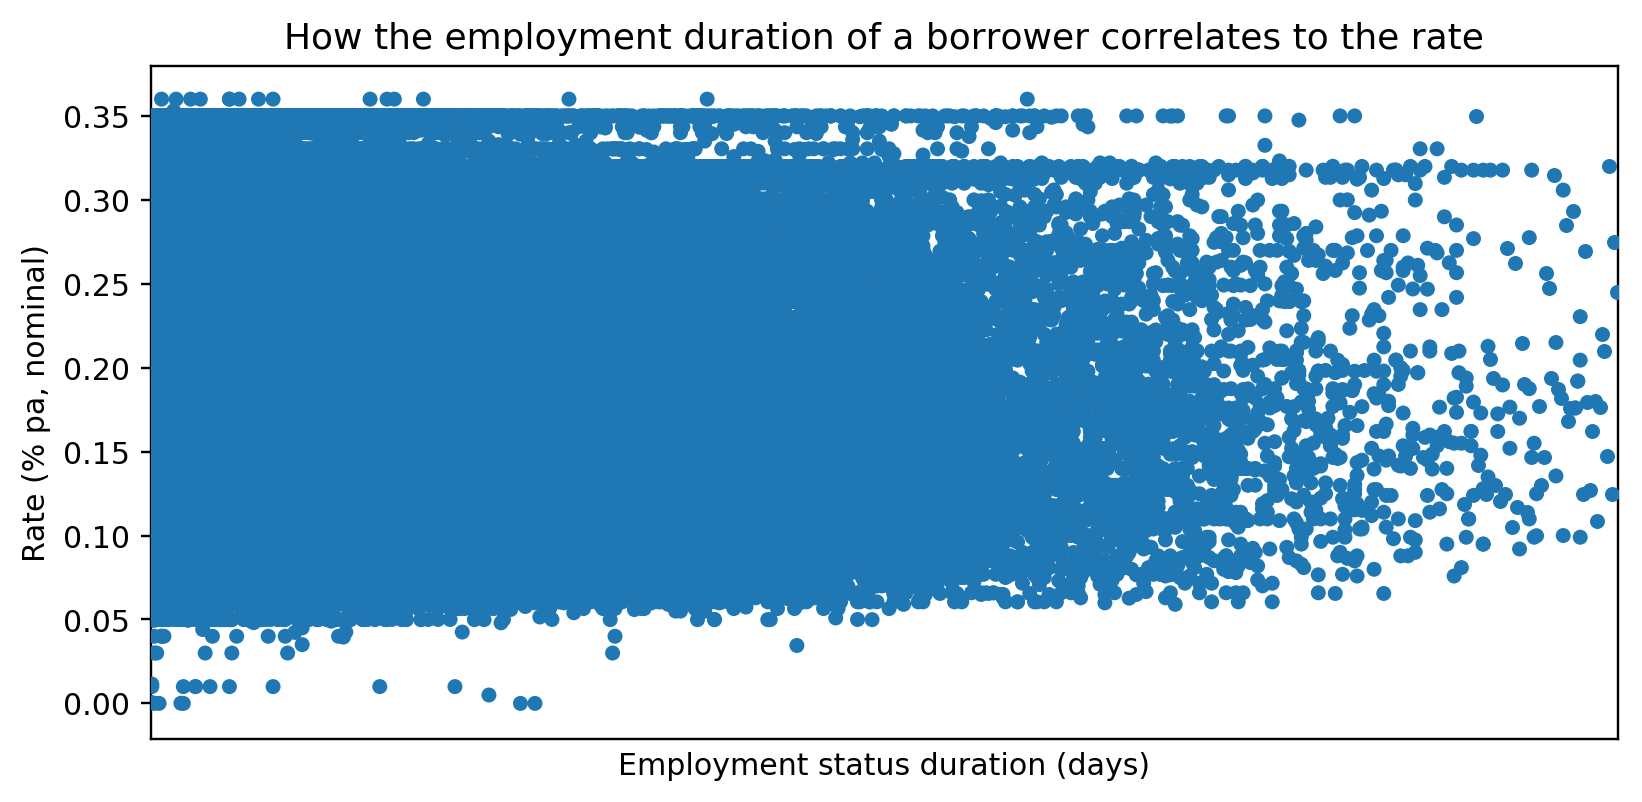

In [35]:
#4. employment duration

#see correlation between `EmploymentStatusDuration` and `BorrowerRate`
fig, ax = create_sub()
sns.stripplot(df.EmploymentStatusDuration, df.BorrowerRate, color=default_blue)

#title
plt.title('How the employment duration of a borrower correlates to the rate')

#labels
plt.xlabel('Employment status duration (days)')
plt.ylabel('Rate (% pa, nominal)');

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

In [18]:
#correlation matrix of `EmploymentDuration` and `BorrowerRate`
corr_df = pd.DataFrame([df.EmploymentStatusDuration, df.BorrowerRate]).transpose()
corr_df.corr()

EmploymentStatusDuration  BorrowerRate
EmploymentStatusDuration                  1.000000     -0.019907
BorrowerRate                             -0.019907      1.000000

#### Findings

##### Employment Status Duration
* `BorrowerRate` is clustered at the range 0.05% to 0.35% for most levels of `EmploymentStatusDuration`
    * the cluster is dense at low to mid duration and sparse thereafter
    * at the highest income levels, individual points do not overlap as much as at other levels
* correlation is not clear from the visualisation
    * will jitter the data points for visual clarity
    * there is very weak, negative correlation (_c._ -0.02) according to the correlation matrix
* there are outliers
    * there are fewer unusually low than high rates
    
what happens when data points are jittered?

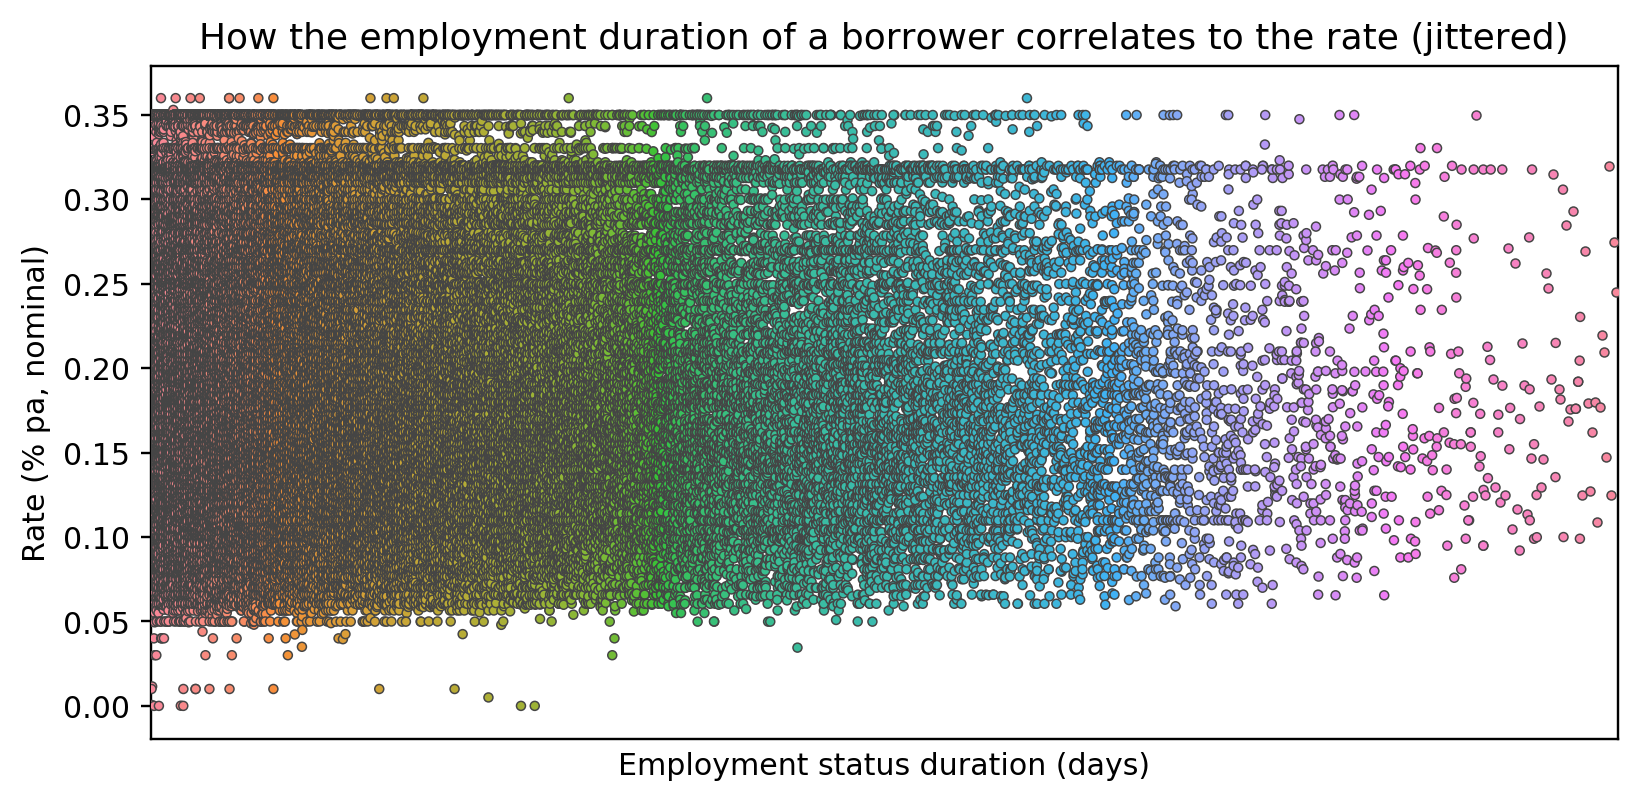

In [11]:
#jittered stripplot for `BorrowerRate` against `EmploymentDuration`

fig, ax = create_sub()
sns.stripplot(df.EmploymentStatusDuration, df.BorrowerRate, jitter=0.25, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the employment duration of a borrower correlates to the rate (jittered)')

#labels
plt.xlabel('Employment status duration (days)')
plt.ylabel('Rate (% pa, nominal)');

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

##### what happens when data points are jittered...

* edges become clearer
    * the upper bound at the 0.35% rate can be seen
    * the lower bound is not quite as prominent as the upper one
    * at lower rate levels (0.0% - 0.05%), there are more data points at low duration than high duration
* trends begin to appear
    * data points form lines at 0.35%, 0.325%, 0.275% and 0.25%
    * the left of the cluster, that is, the region of low duration, is quite dense
        * the number of data points here apprears to be more-than-average

### Question #6

##### Does the `BorrowerRate` affect the proportion of loan funded by investors?

* see correlation between `BorrowerRate` and `PercentFunded` using a scatter plot

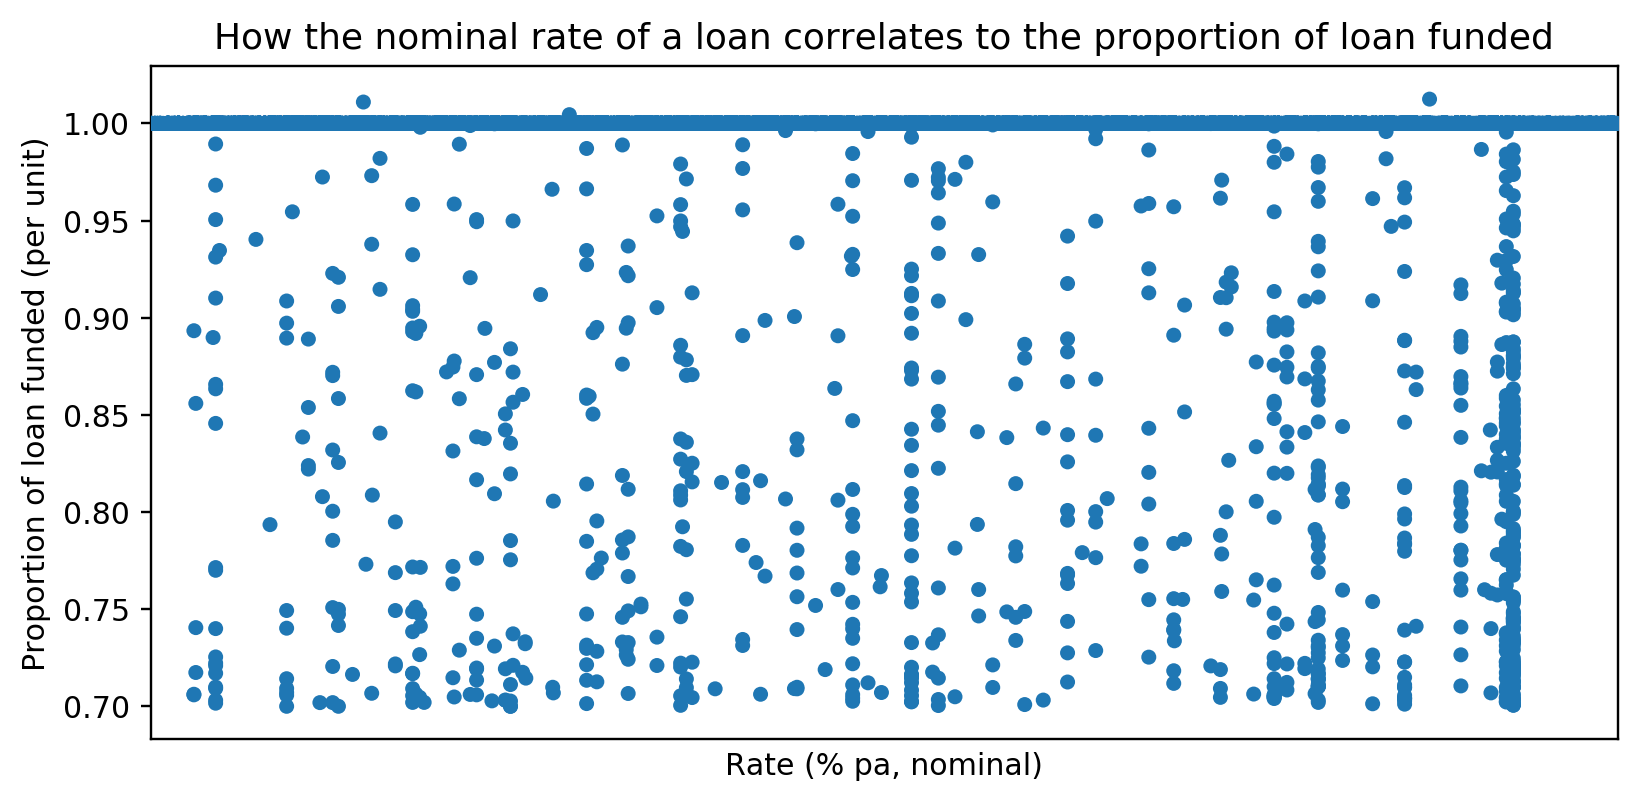

In [14]:
#see correlation between `BorrowerRate` and `PercentFunded`
fig, ax = create_sub()
sns.stripplot(df.BorrowerRate, df.PercentFunded, color=default_blue)

#title
plt.title('How the nominal rate of a loan correlates to the proportion of loan funded')

#labels
plt.xlabel('Rate (% pa, nominal)')
plt.ylabel('Proportion of loan funded (per unit)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

In [22]:
#correlation matrix of `BorrowerRate` and `PercentFunded`
corr_df = pd.DataFrame([df.BorrowerRate, df.PercentFunded]).transpose()
corr_df.corr()

BorrowerRate  PercentFunded
BorrowerRate       1.000000      -0.029025
PercentFunded     -0.029025       1.000000

#### Findings

* `PercentFunded` is clustered at the range 0.7 (70% funding) to 1 (100% funding) for all levels of `BorrowerRate`
    * there is a clear line at 100% funding
    * there is a cluster of points at the high rate level beyond which loans are funded only 100%
* the data points are all over the place, so to speak
    * correlation is not clear from the visualisation
        * will jitter the data points for visual clarity
        * there is very weak, negative correlation (_c._ -0.03) according to the correlation matrix

what happens when data points are jittered?

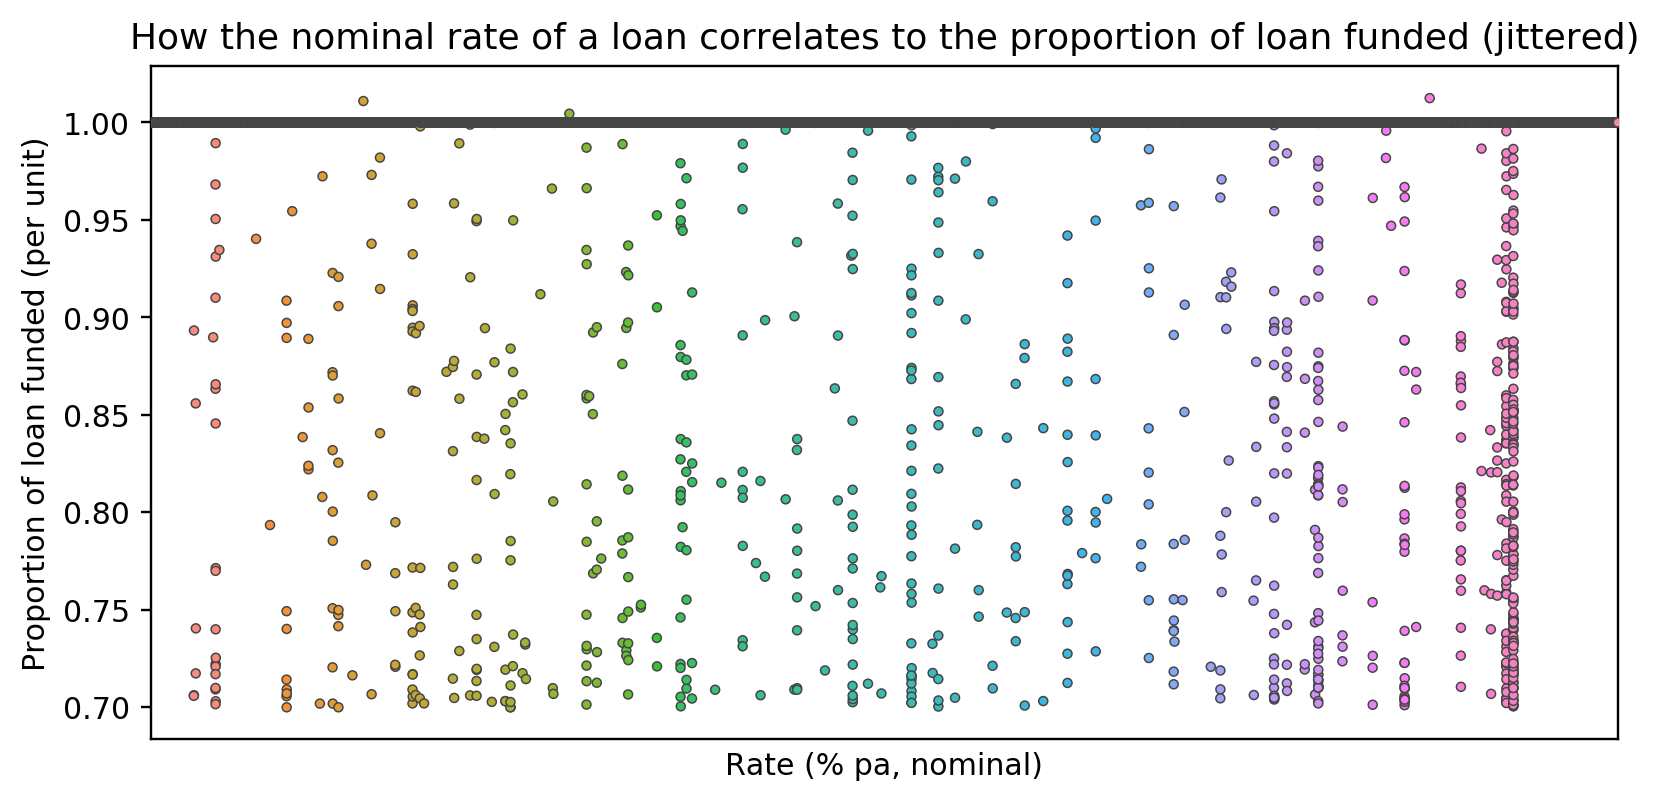

In [48]:
#jittered stripplot for `BorrowerRate` against `PercentFunded`

fig, ax = create_sub()
sns.stripplot(df.BorrowerRate, df.PercentFunded, jitter=0.25, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the nominal rate of a loan correlates to the proportion of loan funded (jittered)')

#labels
plt.xlabel('Rate (% pa, nominal)')
plt.ylabel('Proportion of loan funded (per unit)')

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

###### what happens when data points are jittered...

* edges become clearer
    * the line at the 100% proportion can be seen
    * the cluster at the high rate level is prominent
* trends begin to appear
    * data points form lines at regular intervals of the rate
* the data points above 100% proportion are as a result of jittering; please ignore these

### Question #7

##### Does the `BorrowerRate` affect the number of investors of a loan?

* see correlation between `BorrowerRate` and `Investor` using a scatter plot

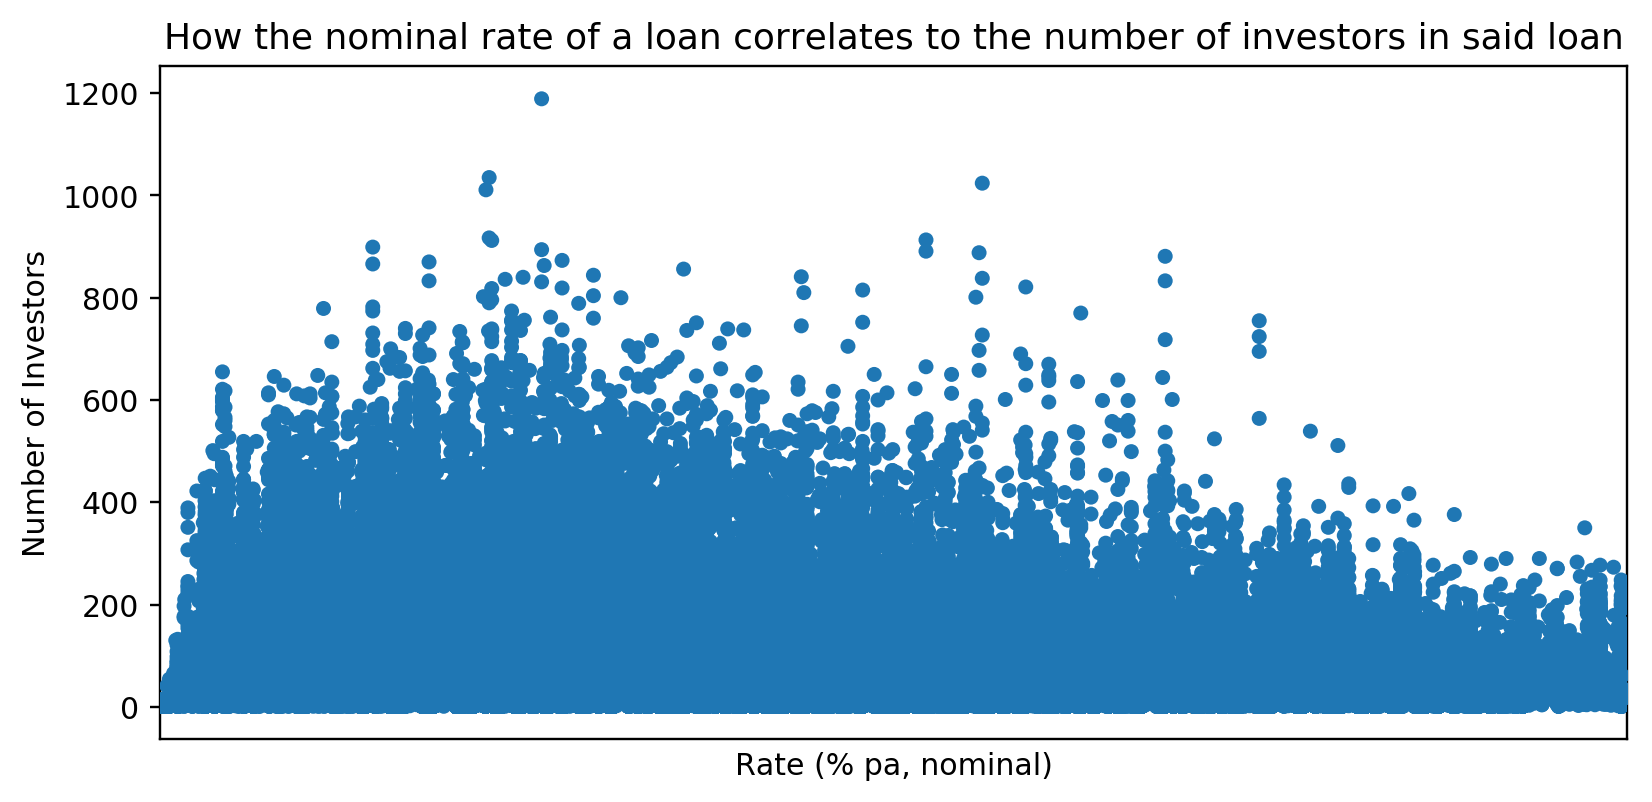

In [25]:
#see correlation between `BorrowerRate` and `Investors`
fig, ax = create_sub()
sns.stripplot(df.BorrowerRate, df.Investors, color=default_blue)

#title
plt.title('How the nominal rate of a loan correlates to the number of investors in said loan')

#labels
plt.xlabel('Rate (% pa, nominal)')
plt.ylabel('Number of Investors');

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

In [16]:
#correlation matrix of `BorrowerRate` and `Investors`
corr_df = pd.DataFrame([df.BorrowerRate, df.Investors]).transpose()
corr_df.corr()

BorrowerRate  Investors
BorrowerRate      1.000000  -0.274217
Investors        -0.274217   1.000000

#### Findings

* `Investors` is clustered at the range 0 to _c._ 400 for all levels of `BorrowerRate`
    * the cluster is densest at the range 0 to 200
    * there apprears to be more data points at the region of low rates and low number of investors
    * there appears to be a lot of data points at `Investors` = 0
* correlation is not clear from the visualisation
    * will jitter the data points for visual clarity
    * there is weak, negative correlation (_c._ -0.27) according to the correlation matrix
    
    
what happens when data points are jittered?

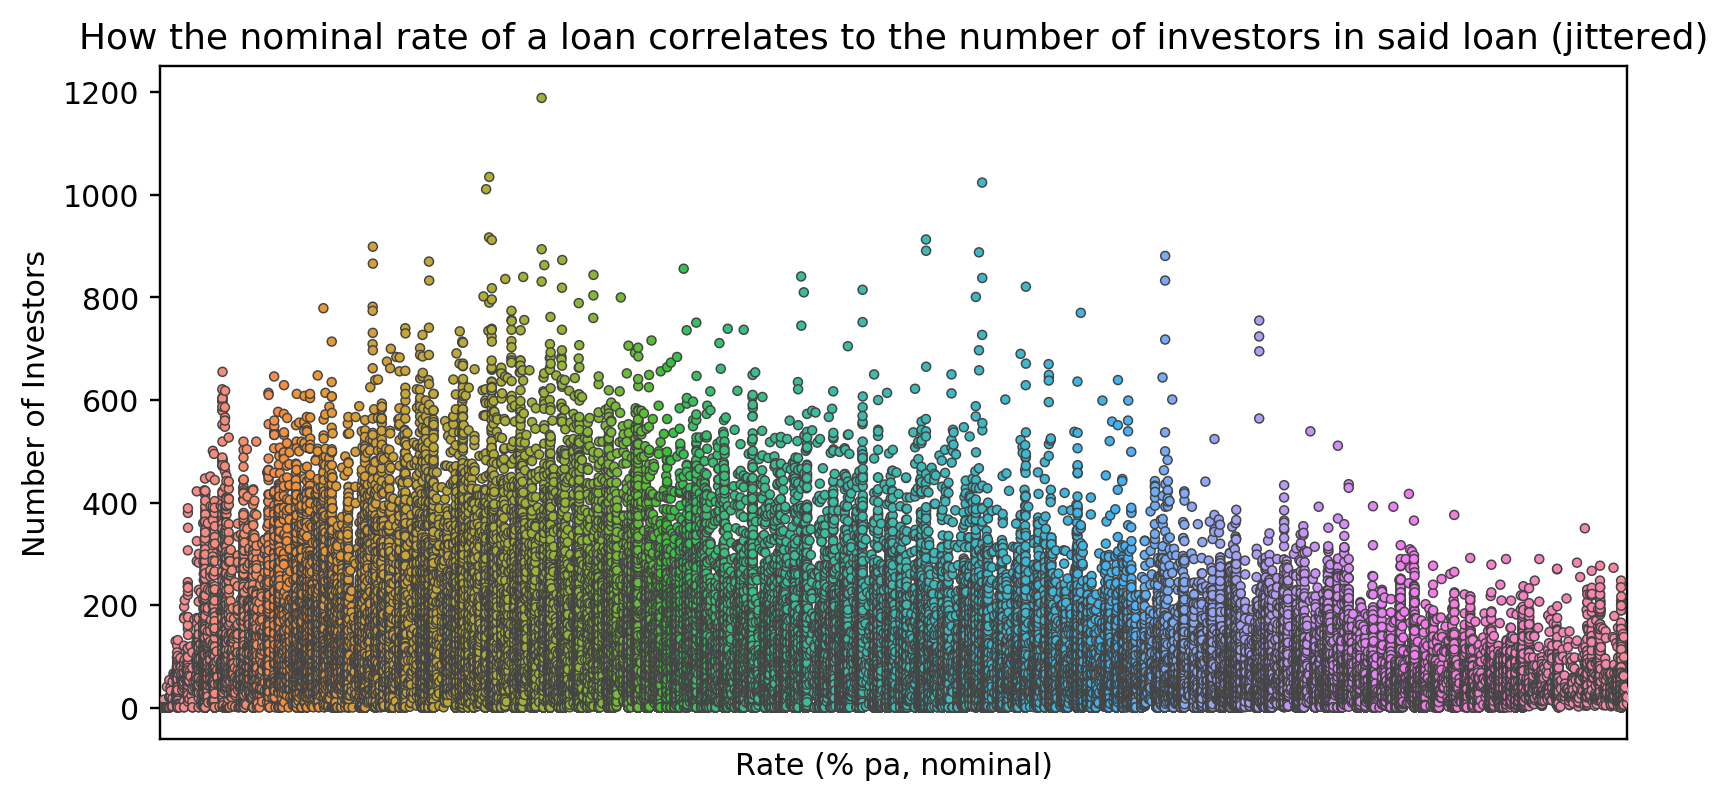

In [47]:
#jittered stripplot for `BorrowerRate` against `Investors`

fig, ax = create_sub()
sns.stripplot(df.BorrowerRate, df.Investors, jitter=0.25, size=3, ax=ax, linewidth=.5)

#title
plt.title('How the nominal rate of a loan correlates to the number of investors in said loan (jittered)')

#labels
plt.xlabel('Rate (% pa, nominal)')
plt.ylabel('Number of Investors');

#supress xticks; only the trend is required
with suppress(TypeError):
    plt.xticks(np.arange(0, 0, 1), None);

###### what happens when data points are jittered...

* edges become clearer
    * the data points at the range 0 to 200 investors are dense
    * the cluster at the high rate level is less dense than that of the lower level
* trends begin to appear
    * data points have more-than-average number of investors at regular intervals of the rate
        * the number goes to 1,200 at mid-level rate

### Disscussion on some of the relationships observed in this part of the investigation 

#### how did the feature(s) of interest vary with other features in the dataset?

###### `BorrowerRate` vs `Term`
* an overwhelming majority of loans of all terms are in the range 0.05% to 0.35%
* majority of the tenure of the loans is 3 years or more
* the correlation co-efficient is _c._ 0.02; it shows very weak, positive correlation

###### `BorrowerRate` vs `BorrowerAPR`
* there is a positive correlation between `BorrowerAPR` and `BorrowerRate`
* the positive correlation is very strong (_c._ 0.99)
    
###### `BorrowerRate` vs `StatedMonthlyIncome`
* the upper bound at the 0.35% rate can be seen
* the region of high income and low rates is quite dense; the number of data points here apprears to be more than average
* the correlation co-efficient is _c._ -0.09; it shows very weak, negative correlation

###### `BorrowerRate` vs `EmploymentStatusDuration`
* the upper bound at the 0.35% rate can be seen
* the lower bound is not quite as prominent as the upper one
* the correlation co-efficient is _c._ 0.02; it shows very weak, positive correlation

###### `PercentFunded` vs `BorrowerRate`
* `PercentFunded` is clustered at the range 0.7 (70% funding) to 1 (100% funding) for all levels of `BorrowerRate`
* the data points are all over the place, so to speak
* there is very weak, negative correlation (_c._ -0.03)

##### `PercentFunded` vs `Investors`
* `Investors` is clustered at the range 0 to _c._ 400 for all levels of `BorrowerRate`
* the cluster is densest at the range 0 to 200
* there is weak, negative correlation (_c._ -0.27)

#### are there any interesting relationships between the other features (not the main feature(s) of interest)?

###### `BorrowerRate` vs `Term`
* there are unusually high and low rates at `Term` = 36 months

###### `BorrowerRate` vs `BorrowerAPR`
* there is interesting behaviour at the extremes
    * low effective rates have quite low nominal rates and vice versa

###### `BorrowerRate` vs `StatedMonthlyIncome`
* at lower rate levels (0.0% - 0.05%), there are more observations of low income than high income
* data points form lines at 0.35%, 0.325%, 0.29%, 0.15% and 0.1%

###### `BorrowerRate` vs `EmploymentStatusDuration`
* the region of low duration, at all rate levels, is quite dense; the number of data points here apprears to be more than average
* at lower rate levels (0.0% - 0.05%), there are more data points at low duration than high duration
* data points form lines at 0.35%, 0.325%, 0.275% and 0.25%

###### `PercentFunded` vs `BorrowerRate`
* there is a clear line at 100% funding
* there is a cluster of points at the high rate level beyond which loans are funded only 100%

###### `PercentFunded` vs `Investors`
* there apprears to be a lot of data points at the region of low rates and low number of investors
* data points have more-than-average number of investors at regular intervals of the rate

<div id="multivar"></div>

## Multivariate Exploration

### Will follow the [method](#method) used in [univariate exploration](#univar)

### Question #8

##### What is the correlation between the rate, term, stated monthly income and employment status duration of a loan?

* use `seaborn` to show correlation between `Borrowerrate`, `Term`, `BorrowerAPR`, `StatedMonthlyIncome` and `EmploymentStatusDuration`

In [20]:
#df to use for viz
corr_df = pd.DataFrame([df.BorrowerRate, df.Term, df.BorrowerAPR, df.StatedMonthlyIncome, df.EmploymentStatusDuration]).transpose()
corr_df = corr_df[pd.notnull(corr_df['EmploymentStatusDuration'])]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106312 entries, 0 to 113936
Data columns (total 5 columns):
BorrowerRate                106312 non-null float64
Term                        106312 non-null float64
BorrowerAPR                 106312 non-null float64
StatedMonthlyIncome         106312 non-null float64
EmploymentStatusDuration    106312 non-null float64
dtypes: float64(5)
memory usage: 4.9 MB


/opt/conda/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


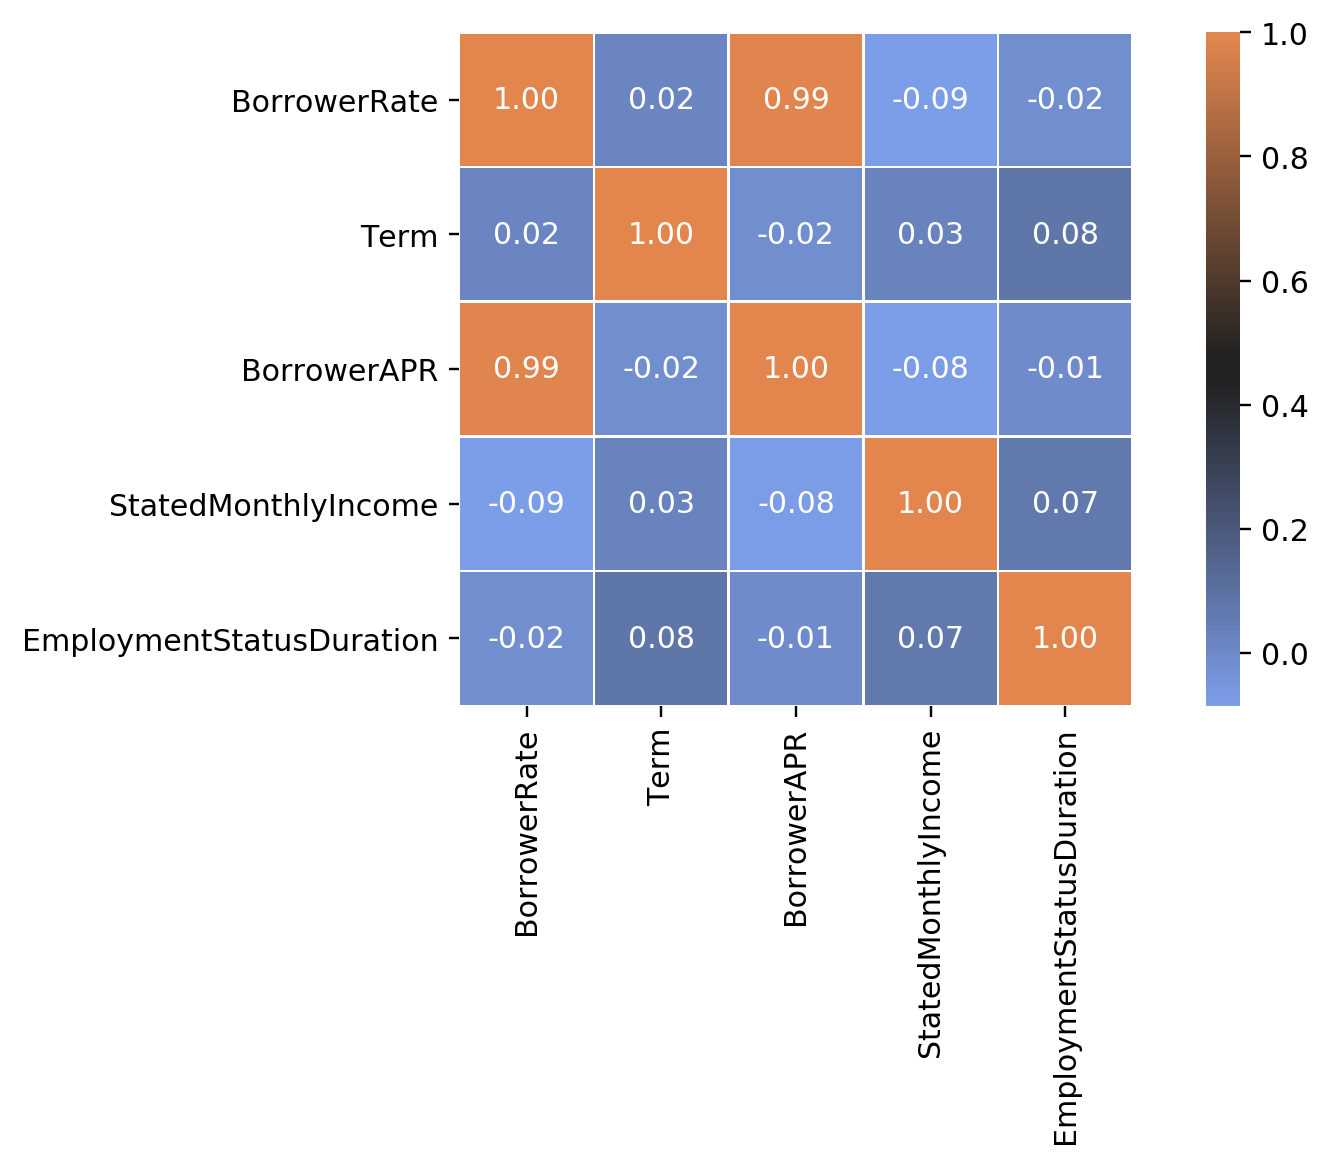

In [21]:
#sub-plots
fig, ax = create_sub()

#correlation matrix
corr = corr_df.corr()

#plot
with suppress(DeprecationWarning, ImportWarning):
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);

In [14]:
corr

BorrowerRate      Term  BorrowerAPR  \
BorrowerRate                  1.000000  0.019477     0.991063   
Term                          0.019477  1.000000    -0.019929   
BorrowerAPR                   0.991063 -0.019929     1.000000   
StatedMonthlyIncome          -0.085369  0.025230    -0.080524   
EmploymentStatusDuration     -0.019907  0.082476    -0.008589   

                          StatedMonthlyIncome  EmploymentStatusDuration  
BorrowerRate                        -0.085369                 -0.019907  
Term                                 0.025230                  0.082476  
BorrowerAPR                         -0.080524                 -0.008589  
StatedMonthlyIncome                  1.000000                  0.069830  
EmploymentStatusDuration             0.069830                  1.000000

#### Findings

* there is weak, positive correlation between
    * `Term` and `BorrowerRate` -> _c._ 0.02
    * `Term` and `StatedMonthlyIncome` -> _c._ 0.03
    * `Term` and `EmploymentStatusDuration` -> _c._ 0.09
    * `StatedMonthlyIncome` and `EmploymentStatusDuration` -> _c._ 0.07
* there is weak, negative correlation between
    * `BorrowerRate` and `StatedMonthlyIncome` -> _c._ -0.09
    * `BorrowerRate` and `EmploymentStatusDuration` -> _c._ -0.02
    * `Term` and `BorrowerAPR` -> _c._ -0.02
    * `StatedMonthlyIncome` and `BorrowerAPR` -> _c._ -0.08
    * `EmploymentStatusDuration` and `BorrowerAPR` -> _c._ -0.01
* there is strong, positive correlation between
    * `BorrowerAPR` and `BorrowerRate` -> _c._ 0.99
* none of the variables of interest have a strong, negative correlation



### Question #9

##### What is the correlation between the rate,  proportion funded and number of investors of a loan?

* use `seaborn` to show correlation between `Borrowerrate`, `PercentFunded`, and `Investors`

In [8]:
#df to use for viz
corr_df = pd.DataFrame([df.BorrowerRate, df.PercentFunded, df.Investors]).transpose()
corr_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
BorrowerRate     113937 non-null float64
PercentFunded    113937 non-null float64
Investors        113937 non-null float64
dtypes: float64(3)
memory usage: 2.6 MB


/opt/conda/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


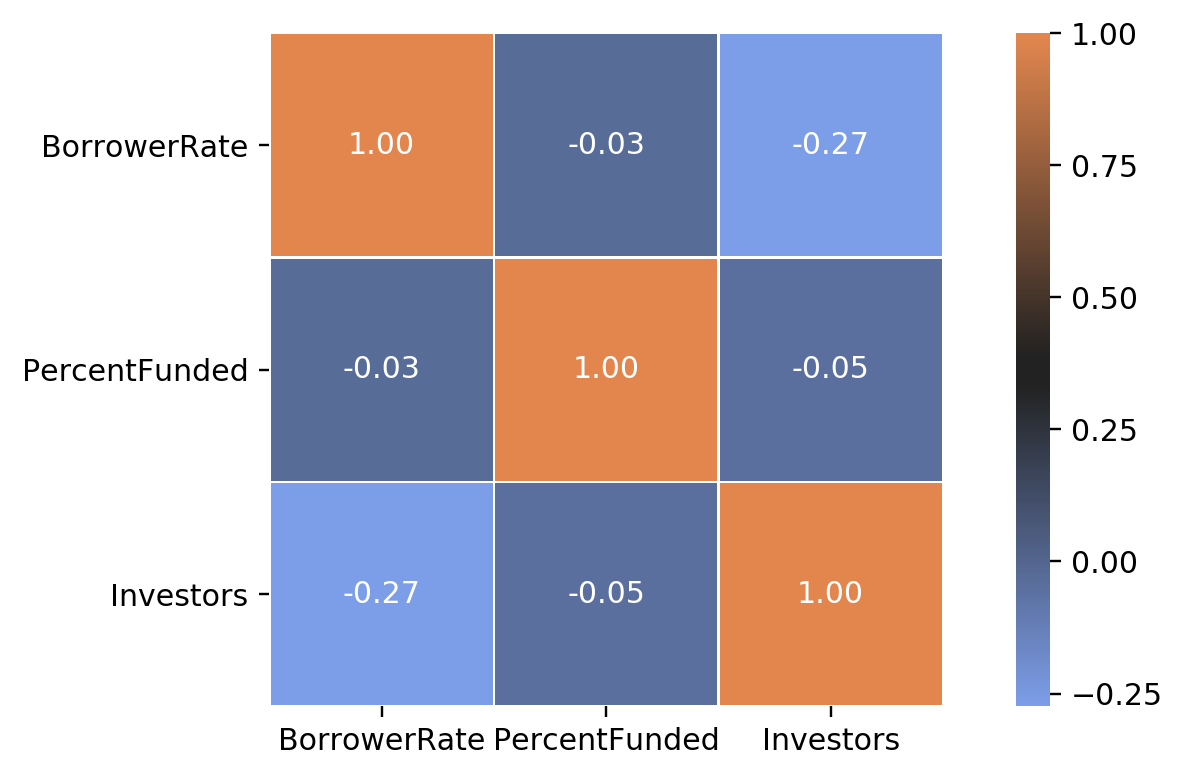

In [10]:
#sub-plots
fig, ax = create_sub()

#correlation matrix
corr = corr_df.corr()

#plot
with suppress(DeprecationWarning, ImportWarning):
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);

In [11]:
corr

BorrowerRate  PercentFunded  Investors
BorrowerRate       1.000000      -0.029025  -0.274217
PercentFunded     -0.029025       1.000000  -0.049716
Investors         -0.274217      -0.049716   1.000000

#### Findings

* none of the variables of interest have a weak, positive correlation
* there is weak, negative correlation between
    * `BorrowerRate` and `PercentFunded` -> _c._ -0.03
    * `BorrowerRate` and `Investors` -> _c._ -0.27
    * `PercentFunded` and `Investors` -> _c._ -0.05
* none of the variables of interest have a strong, positive correlation
* none of the variables of interest have a strong, negative correlation


### Discussion on some of the relationships observed in this part of the investigation

#### are there features that strengthened each other in terms of looking at the feature(s) of interest?
* yes and no
    * no, the investigation shows that the features of interest do not affect `BorrowerRate` as much as expected
    * yes, the investigation shows that the features of interest, _sans_ `BorrowerRate` do not affect each other significantly
* ditto, for features affecting `Investors`

#### are there any interesting or surprising interactions between features?
* no; there are no surprises, yet

<div id="summary"></div>

## Summary of Findings

### Loans
* average amount borrowed is _c._ USD 8,337.00; the range is USD 1,000.00 to 35,000.00
    * loans of amount USD 5k, 10k, 15k, 20k and 25k have higher-than-average frequency
* average rate is _c._ 0.19%; the range is zero to 0.5%
* the number of loans disbursed changes with time
    * the number fluctuates
        * there are seemingly regular but wide fluctuations
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
    * the number of loans issued appears to increase exponentially despite the fluctuations
    * the average number of loans issued, per annum, between 2005 and 2014 inclusive is _c._ 4.3 million
* an overwhelming majority of loans of all terms are in the range 0.05% to 0.35% borrowing rate
* majority of the tenure of the loans is 3 years or more
* the least funded loans are at 70% funding for all levels of borrowing rate

### Occupations and employment status
* an overwhelming majority of the top ten occupations are [white collar](https://www.investopedia.com/terms/w/whitecollar.asp)
* a majority of the bottom ten occupations, that are not students, are [blue collar](https://www.investopedia.com/terms/b/bluecollar.asp); half of the occupations in the bottom ten are students
* Prosper lends to unemployed applicants

### Income level
* Prosper appears to prefer to lend to high income earners at less-than-average rates
    * the region of high income and low rates is quite dense
    * an overwhelming majority of loans are issued to those whose income level is above USD 25,000.00 _p.a._
        * the top 2 groups account for 55.8% of loans issued 
        * the top 4 groups account for 85.4% of loans issued

### Home ownership status
* there is an almost-even split between those that own a home and those that do not; 50.4% of borrowers own a home

### Location of borrower
* a majority of the states with the least borrowers are from the so-called "[fly-over country](https://en.wikipedia.org/wiki/Flyover_country)"
* all of the states with the most borrowers are on either [seaboard](https://www.oxfordlearnersdictionaries.com/us/definition/english/seaboard)

### Factors that affect the nominal borrowing rate
* there is weak, positive correlation between `BorrowerRate` and `Term` -> _c._ 0.02
* there is weak, negative correlation between
    * `BorrowerRate` and `StatedMonthlyIncome` -> _c._ -0.09
    * `BorrowerRate` and `EmploymentStatusDuration` -> _c._ -0.02
* there is strong, positive correlation between
    * `BorrowerRate` and `BorrowerAPR` -> _c._ 0.99
* none of the variables of interest have a strong, negative correlation

### Factors that affect the number of investors
* none of the variables of interest have a weak, positive correlation
* there is weak, negative correlation between
    * `Investors` and `BorrowerRate` -> _c._ -0.27
    * `Investors` and `PercentFunded` -> _c._ -0.05
* none of the variables of interest have a strong, positive correlation
* none of the variables of interest have a strong, negative correlation

<div id="outro"></div>

## Conclusions

* Prosper's customer is, mostly, a white collar worker who:
    * earns at least USD 25,000.00 a year
    * may or may not own a home
    * lives on either seaboard
    * applies for a _c._ USD 8,400.00 loan
    * to re-pay in at least 3 years
    * at _c._ 0.19% _p.a._ nominal
* the factors investigated do not affect the borrowing rate significantly; a more extensive and rigorous investigation must be done
* the factors investigated do not affect the proportion of loans invested in significantly; a more extensive and rigorous investigation must be done

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_1_exploration.html'])

255